# Synthea Capstone Project - Data Wrangling

#### In the data wrangling section of this project, the raw data is loaded into the workspace and initial data exploration is performed. This dataset is comprised of 18 csv files containing synthetic medical records for 100+ patients from each state in the USA. The overall goal of this project is to develop a tool that predicts yearly healthcare costs for each patient, so that patients and doctors can work together to improve patient health and reduce medical expenses. In this section, data that may be useful for downstream applications is combined into one main dataframe that will be cleaned and used for modeling in future steps of this project.

In order to download the data, instructions from the Synthea GitHub page were followed (https://github.com/synthetichealth/synthea). The following code was used to obtain 100 living patients from each of the 50 states in the United States.

In [4]:
# $states = "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", 
# "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", 
# "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", 
# "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", 
# "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"; 
# foreach ($state in $states) { java -jar synthea-with-dependencies.jar $state -p 100 -c settings.properties }
# exporter.csv.append_mode = true

Relevant modules are imported into the workspace.

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from datetime import date
import warnings
warnings.filterwarnings('ignore')

First, the patients csv is loaded into the workspace. This contains demographic information about the patients, including name, patient ID number, race, gender, address, income, and their total healthcare expenses throughout their entire life. The length of this dataset, or the number of patients, is checked.

In [8]:
patients = pd.read_csv('used_data/patients.csv')
len(patients)

5871

This makes sense, as 100 live patients from each of the 50 states was generated. The additional 871 entries are patients that are no longer living. Next, the columns titles and their data types are examined.

In [10]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5871 entries, 0 to 5870
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   5871 non-null   object 
 1   BIRTHDATE            5871 non-null   object 
 2   DEATHDATE            871 non-null    object 
 3   SSN                  5871 non-null   object 
 4   DRIVERS              4782 non-null   object 
 5   PASSPORT             4486 non-null   object 
 6   PREFIX               4634 non-null   object 
 7   FIRST                5871 non-null   object 
 8   MIDDLE               4693 non-null   object 
 9   LAST                 5871 non-null   object 
 10  SUFFIX               39 non-null     object 
 11  MAIDEN               1489 non-null   object 
 12  MARITAL              3887 non-null   object 
 13  RACE                 5871 non-null   object 
 14  ETHNICITY            5871 non-null   object 
 15  GENDER               5871 non-null   o

To get a better idea of what the dataframe looks like, the first 5 rows are examined.

In [12]:
patients.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,0e834632-ac19-f67a-a931-eeaad341af8a,2020-04-01,NaN,999-73-9599,NaN,NaN,NaN,Berry486,Hoyt490,Leannon79,...,Lincoln,Alabama,Talladega County,1121.0,35096,33.539730,-86.036242,900.00,20136.45,21478
1,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,1981-01-07,NaN,999-35-3783,S99978965,X73462211X,Mr.,Margarito178,Jan231,Lockman863,...,Moody,Alabama,St. Clair County,1073.0,35173,33.591662,-86.403661,98921.73,0.00,89823
2,bd670871-fcd9-6c34-6616-8faa27bccdfc,2000-07-09,NaN,999-17-6829,S99913902,X35746002X,Mr.,Chong355,Buddy254,Bergnaum523,...,Mobile,Alabama,Mobile County,1097.0,36609,30.704774,-88.153451,44245.06,9334.53,54400
3,8208a9d1-02cb-3302-866e-9d0bd8f8ed67,2007-12-23,NaN,999-34-8090,S99992816,NaN,NaN,Harry448,Christoper325,White193,...,Hoover,Alabama,Jefferson County,1073.0,35216,33.418629,-86.692835,43520.86,1261.76,35376
4,6286c263-7984-d01a-0228-9cd53c5aa010,1989-01-03,NaN,999-48-1638,S99910863,X32546830X,Mr.,Kieth891,Brent147,Bartell116,...,Huntsville,Alabama,Madison County,1089.0,35757,34.685214,-86.852762,114453.55,1431.40,93837


Next, the number and percentage of missing values in each column of the dataframe are checked.

In [14]:
missing_patients = pd.concat([patients.isnull().sum(), 100 * patients.isnull().mean()], axis=1)
missing_patients.columns = ['count', '%']
missing_patients.sort_values(by = 'count', ascending = False)

,count,%
SUFFIX,5832,99.335718
DEATHDATE,5000,85.164367
MAIDEN,4382,74.638051
MARITAL,1984,33.793221
PASSPORT,1385,23.590530
PREFIX,1237,21.069664
MIDDLE,1178,20.064725
DRIVERS,1089,18.548799
FIPS,986,16.794413
Id,0,0.000000


For this study, only living patients will be analyzed, so the rows with a value in the deathdate column can be filtered out.
The suffix, deathdate, maiden name, marital status, passport identifier, prefix, middle name, driver's license identifier, and FIPS county code all contain some missing values. These values will not be useful for analysis, so they can be removed from the dataframe.

In [16]:
alive_patients = patients[patients['DEATHDATE'].isna()]
filter_patients = alive_patients.dropna(axis = 1)
filter_patients

,Id,BIRTHDATE,SSN,FIRST,LAST,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,0e834632-ac19-f67a-a931-eeaad341af8a,2020-04-01,999-73-9599,Berry486,Leannon79,white,nonhispanic,M,Huntsville Alabama US,463 Hagenes Dam Apt 15,Lincoln,Alabama,Talladega County,35096,33.539730,-86.036242,900.00,20136.45,21478
1,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,1981-01-07,999-35-3783,Margarito178,Lockman863,white,nonhispanic,M,Birmingham Alabama US,413 Feest Track,Moody,Alabama,St. Clair County,35173,33.591662,-86.403661,98921.73,0.00,89823
2,bd670871-fcd9-6c34-6616-8faa27bccdfc,2000-07-09,999-17-6829,Chong355,Bergnaum523,white,nonhispanic,M,Huntsville Alabama US,175 Goodwin View,Mobile,Alabama,Mobile County,36609,30.704774,-88.153451,44245.06,9334.53,54400
3,8208a9d1-02cb-3302-866e-9d0bd8f8ed67,2007-12-23,999-34-8090,Harry448,White193,black,nonhispanic,M,Holtville Alabama US,173 McLaughlin Track,Hoover,Alabama,Jefferson County,35216,33.418629,-86.692835,43520.86,1261.76,35376
4,6286c263-7984-d01a-0228-9cd53c5aa010,1989-01-03,999-48-1638,Kieth891,Bartell116,white,nonhispanic,M,Huntsville Alabama US,702 Ryan Meadow Unit 70,Huntsville,Alabama,Madison County,35757,34.685214,-86.852762,114453.55,1431.40,93837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,613f1c35-67dc-98df-2055-1f1435a62dd2,1938-09-12,999-41-9953,Dominique369,Erdman779,asian,nonhispanic,F,Powell Wyoming US,798 Weber Wall Unit 27,Ranchettes,Wyoming,Laramie County,0,41.186693,-104.818492,376528.48,2519267.31,744167
5861,6f812221-030b-9b27-7a09-694eaf705bb7,1956-09-08,999-28-3421,Stacey209,Kihn564,white,nonhispanic,F,Urie Wyoming US,881 Dickens Avenue,Cheyenne,Wyoming,Laramie County,82009,41.161035,-104.824174,259970.29,1267448.07,24136
5865,53d3f1df-043e-f016-5fd2-8adcbfd6f9fc,1940-07-22,999-86-1535,Owen89,Pollich983,white,nonhispanic,M,Casper Wyoming US,790 Hegmann Junction,Afton,Wyoming,Lincoln County,83110,42.741628,-110.850109,290867.71,81699.96,117069
5869,e415d6de-36b3-70c8-6e96-55232a481180,1936-09-22,999-92-2414,Wesley533,Reilly981,white,nonhispanic,M,Bairoil Wyoming US,610 Harber Wall,Casper,Wyoming,Natrona County,82601,42.870966,-106.171144,204974.70,571755.51,130857


Finally, each patient's age at the end of 2023 is calculated. To do this, their birthday will be converted into the python datetime format and subtracted from December 31st 2023.

In [18]:
filter_patients['BIRTHDATE'] = pd.to_datetime(filter_patients['BIRTHDATE'].astype(str).str.strip(), format='ISO8601')
d = datetime.datetime(2023, 12, 31, 0, 0, 0)
filter_patients['AGE'] = (d - filter_patients['BIRTHDATE']) // datetime.timedelta(days=365.2425)
filter_patients

,Id,BIRTHDATE,SSN,FIRST,LAST,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME,AGE
0,0e834632-ac19-f67a-a931-eeaad341af8a,2020-04-01,999-73-9599,Berry486,Leannon79,white,nonhispanic,M,Huntsville Alabama US,463 Hagenes Dam Apt 15,Lincoln,Alabama,Talladega County,35096,33.539730,-86.036242,900.00,20136.45,21478,3
1,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,1981-01-07,999-35-3783,Margarito178,Lockman863,white,nonhispanic,M,Birmingham Alabama US,413 Feest Track,Moody,Alabama,St. Clair County,35173,33.591662,-86.403661,98921.73,0.00,89823,42
2,bd670871-fcd9-6c34-6616-8faa27bccdfc,2000-07-09,999-17-6829,Chong355,Bergnaum523,white,nonhispanic,M,Huntsville Alabama US,175 Goodwin View,Mobile,Alabama,Mobile County,36609,30.704774,-88.153451,44245.06,9334.53,54400,23
3,8208a9d1-02cb-3302-866e-9d0bd8f8ed67,2007-12-23,999-34-8090,Harry448,White193,black,nonhispanic,M,Holtville Alabama US,173 McLaughlin Track,Hoover,Alabama,Jefferson County,35216,33.418629,-86.692835,43520.86,1261.76,35376,16
4,6286c263-7984-d01a-0228-9cd53c5aa010,1989-01-03,999-48-1638,Kieth891,Bartell116,white,nonhispanic,M,Huntsville Alabama US,702 Ryan Meadow Unit 70,Huntsville,Alabama,Madison County,35757,34.685214,-86.852762,114453.55,1431.40,93837,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,613f1c35-67dc-98df-2055-1f1435a62dd2,1938-09-12,999-41-9953,Dominique369,Erdman779,asian,nonhispanic,F,Powell Wyoming US,798 Weber Wall Unit 27,Ranchettes,Wyoming,Laramie County,0,41.186693,-104.818492,376528.48,2519267.31,744167,85
5861,6f812221-030b-9b27-7a09-694eaf705bb7,1956-09-08,999-28-3421,Stacey209,Kihn564,white,nonhispanic,F,Urie Wyoming US,881 Dickens Avenue,Cheyenne,Wyoming,Laramie County,82009,41.161035,-104.824174,259970.29,1267448.07,24136,67
5865,53d3f1df-043e-f016-5fd2-8adcbfd6f9fc,1940-07-22,999-86-1535,Owen89,Pollich983,white,nonhispanic,M,Casper Wyoming US,790 Hegmann Junction,Afton,Wyoming,Lincoln County,83110,42.741628,-110.850109,290867.71,81699.96,117069,83
5869,e415d6de-36b3-70c8-6e96-55232a481180,1936-09-22,999-92-2414,Wesley533,Reilly981,white,nonhispanic,M,Bairoil Wyoming US,610 Harber Wall,Casper,Wyoming,Natrona County,82601,42.870966,-106.171144,204974.70,571755.51,130857,87


Next, the encounters csv file is loaded into the workspace. This contains information about visits to doctor's offices or hospitals. The column titles and their data types are examined.

In [20]:
encounters = pd.read_csv('used_data/encounters.csv')
encounters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433226 entries, 0 to 433225
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   433226 non-null  object 
 1   START                433226 non-null  object 
 2   STOP                 433226 non-null  object 
 3   PATIENT              433226 non-null  object 
 4   ORGANIZATION         433226 non-null  object 
 5   PROVIDER             433226 non-null  object 
 6   PAYER                433226 non-null  object 
 7   ENCOUNTERCLASS       433226 non-null  object 
 8   CODE                 433226 non-null  int64  
 9   DESCRIPTION          433226 non-null  object 
 10  BASE_ENCOUNTER_COST  433226 non-null  float64
 11  TOTAL_CLAIM_COST     433226 non-null  float64
 12  PAYER_COVERAGE       433226 non-null  float64
 13  REASONCODE           284195 non-null  float64
 14  REASONDESCRIPTION    284195 non-null  object 
dtypes: float64(4), in

To get a better idea of what the dataframe looks like, the first 5 rows are examined.

In [22]:
encounters.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,93dcb4a5-0fda-5351-7916-9b60051c3bab,2020-04-01T20:38:01Z,2020-04-01T20:53:01Z,0e834632-ac19-f67a-a931-eeaad341af8a,91dd22b1-429b-346e-8edc-ea506d8d0f1f,20e1217e-7301-35de-9852-ed832387cceb,df166300-5a78-3502-a46a-832842197811,wellness,410620009,Well child visit (procedure),113.8,670.71,570.71,NaN,NaN
1,b43a2878-63f4-8e86-3985-7399d94672c4,1999-03-03T18:59:09Z,1999-03-03T19:54:49Z,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,f6266baf-0ccc-3540-b0c5-3ec3872101fb,0075c14f-7aa8-3958-940f-0be65066b179,e03e23c9-4df1-3eb6-a62d-f70f02301496,wellness,162673000,General examination of patient (procedure),113.8,708.90,0.00,NaN,NaN
2,23562418-dcba-31a2-3d78-1881d7073f4d,2000-03-08T18:59:09Z,2000-03-08T19:40:12Z,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,f6266baf-0ccc-3540-b0c5-3ec3872101fb,0075c14f-7aa8-3958-940f-0be65066b179,e03e23c9-4df1-3eb6-a62d-f70f02301496,wellness,162673000,General examination of patient (procedure),113.8,976.41,0.00,NaN,NaN
3,d6bb2515-ee7b-ddca-7968-0631a29fbfc5,2003-03-12T18:59:09Z,2003-03-12T19:29:47Z,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,f6266baf-0ccc-3540-b0c5-3ec3872101fb,0075c14f-7aa8-3958-940f-0be65066b179,e03e23c9-4df1-3eb6-a62d-f70f02301496,wellness,162673000,General examination of patient (procedure),113.8,1385.43,0.00,NaN,NaN
4,6bddd9ab-26c7-4d04-4d17-ee933cb6b4a9,2012-03-21T18:59:09Z,2012-03-21T19:47:13Z,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,f6266baf-0ccc-3540-b0c5-3ec3872101fb,0075c14f-7aa8-3958-940f-0be65066b179,e03e23c9-4df1-3eb6-a62d-f70f02301496,wellness,162673000,General examination of patient (procedure),113.8,1563.40,0.00,NaN,NaN


The START column is the date and time when the encounter started, so this will be used as the timestamp for the encounter. This column is converted into the python datetime format. For this project, one full year of encounters data will be analyzed, so the data will be filtered for encounters just in 2023.

In [24]:
encounters['START'] = pd.to_datetime(encounters['START'].astype(str).str.strip(), format='ISO8601')
encounters_23 = encounters[encounters['START'].dt.year == 2023]

Next, the data is reformatted such that each row is a patient identifier and the columns contain the total claim cost and the total number of medical encounters for each year. This format allows this dataframe to be merged with the filtered patients dataframe.

In [26]:
encounters_cost = encounters_23.groupby('PATIENT').agg(encounters_cost = ('TOTAL_CLAIM_COST', 'sum'), num_encounters = ('TOTAL_CLAIM_COST', 'count'))
encounters_cost

,encounters_cost,num_encounters
PATIENT,,
00046c2b-9fdd-1bdd-bf5d-380cdca67299,14669.34,6
0009873a-380f-95c3-87b8-d225d63af8a1,1235.15,1
0033acc1-b2a4-081c-bea3-5c793b20095c,19389.19,3
004028c4-b13b-061f-04cd-65ad79f1a657,30133.10,17
005142a3-491b-68e0-3de5-5e2c7fbdb2fc,5963.08,2
...,...,...
ffb2a026-b770-678f-c0b1-09a5350f03bf,4857.68,4
ffc8051c-184e-791e-cfa7-b97409e4cfdc,4292.13,2
ffd77788-b723-1782-783b-26be3942b4bb,124345.81,19


The encounters dataframe is merged with the patients dataframe to begin building up the dataframe for modeling in future sections of this capstone project.

In [28]:
df = filter_patients.merge(encounters_cost, how = 'left', left_on = 'Id', right_on = 'PATIENT')
df

,Id,BIRTHDATE,SSN,FIRST,LAST,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,...,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME,AGE,encounters_cost,num_encounters
0,0e834632-ac19-f67a-a931-eeaad341af8a,2020-04-01,999-73-9599,Berry486,Leannon79,white,nonhispanic,M,Huntsville Alabama US,463 Hagenes Dam Apt 15,...,Talladega County,35096,33.539730,-86.036242,900.00,20136.45,21478,3,8748.80,4.0
1,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,1981-01-07,999-35-3783,Margarito178,Lockman863,white,nonhispanic,M,Birmingham Alabama US,413 Feest Track,...,St. Clair County,35173,33.591662,-86.403661,98921.73,0.00,89823,42,4659.91,5.0
2,bd670871-fcd9-6c34-6616-8faa27bccdfc,2000-07-09,999-17-6829,Chong355,Bergnaum523,white,nonhispanic,M,Huntsville Alabama US,175 Goodwin View,...,Mobile County,36609,30.704774,-88.153451,44245.06,9334.53,54400,23,NaN,NaN
3,8208a9d1-02cb-3302-866e-9d0bd8f8ed67,2007-12-23,999-34-8090,Harry448,White193,black,nonhispanic,M,Holtville Alabama US,173 McLaughlin Track,...,Jefferson County,35216,33.418629,-86.692835,43520.86,1261.76,35376,16,2817.62,4.0
4,6286c263-7984-d01a-0228-9cd53c5aa010,1989-01-03,999-48-1638,Kieth891,Bartell116,white,nonhispanic,M,Huntsville Alabama US,702 Ryan Meadow Unit 70,...,Madison County,35757,34.685214,-86.852762,114453.55,1431.40,93837,34,4301.42,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,613f1c35-67dc-98df-2055-1f1435a62dd2,1938-09-12,999-41-9953,Dominique369,Erdman779,asian,nonhispanic,F,Powell Wyoming US,798 Weber Wall Unit 27,...,Laramie County,0,41.186693,-104.818492,376528.48,2519267.31,744167,85,40722.20,52.0
4996,6f812221-030b-9b27-7a09-694eaf705bb7,1956-09-08,999-28-3421,Stacey209,Kihn564,white,nonhispanic,F,Urie Wyoming US,881 Dickens Avenue,...,Laramie County,82009,41.161035,-104.824174,259970.29,1267448.07,24136,67,20535.90,13.0
4997,53d3f1df-043e-f016-5fd2-8adcbfd6f9fc,1940-07-22,999-86-1535,Owen89,Pollich983,white,nonhispanic,M,Casper Wyoming US,790 Hegmann Junction,...,Lincoln County,83110,42.741628,-110.850109,290867.71,81699.96,117069,83,8780.74,9.0
4998,e415d6de-36b3-70c8-6e96-55232a481180,1936-09-22,999-92-2414,Wesley533,Reilly981,white,nonhispanic,M,Bairoil Wyoming US,610 Harber Wall,...,Natrona County,82601,42.870966,-106.171144,204974.70,571755.51,130857,87,32392.04,21.0


To begin to visualize our data, histograms of medical encounter costs and number of medical encounters are plotted.

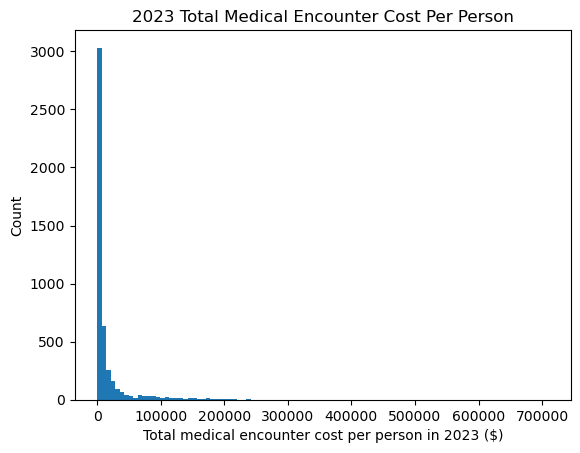

In [30]:
fig, ax = plt.subplots()
ax.hist(df['encounters_cost'], bins = 100)
ax.set_xlabel('Total medical encounter cost per person in 2023 ($)')
ax.set_ylabel('Count')
ax.set_title('2023 Total Medical Encounter Cost Per Person')
plt.show()

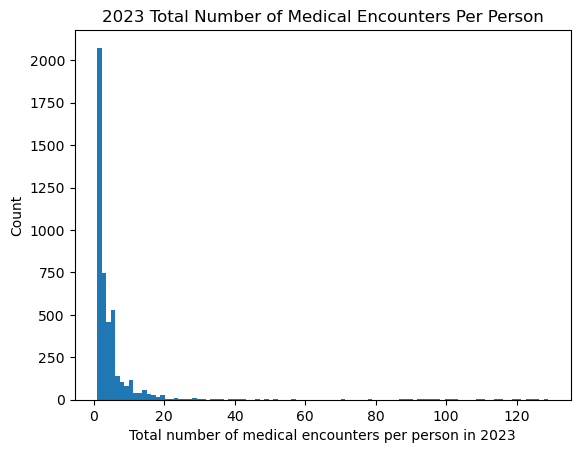

In [31]:
fig, ax = plt.subplots()
ax.hist(df['num_encounters'], bins = 100)
ax.set_xlabel('Total number of medical encounters per person in 2023')
ax.set_ylabel('Count')
ax.set_title('2023 Total Number of Medical Encounters Per Person')
plt.show()

Both graphs are very right skewed, with most cost values in the $0-50,000 range and most number of visit values in the 0-20 range. To visualize this distribution by state, the total average medical encounter cost by state is plotted as a bar chart.

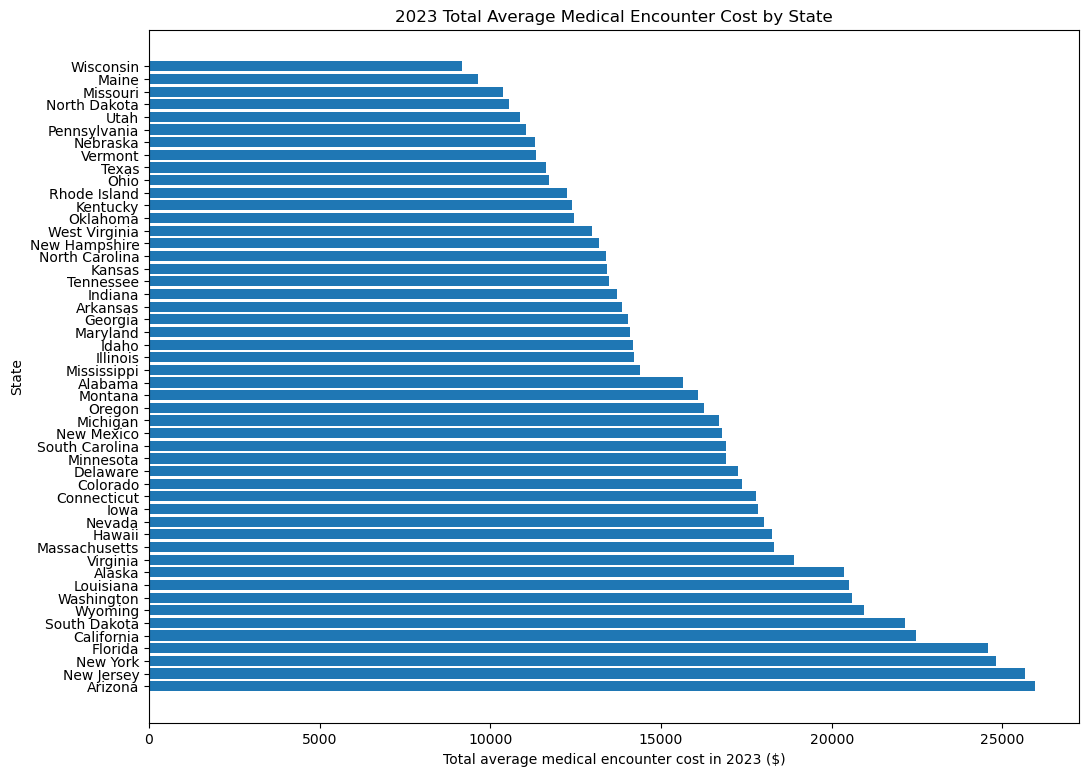

In [33]:
state_cost_mean = df.groupby('STATE').agg(mean_encounters_cost = ('encounters_cost', 'mean'), std_encounters_cost = ('encounters_cost', 'std'))
state_cost_mean = state_cost_mean.reset_index().sort_values(by = 'mean_encounters_cost', ascending = False)
fig, ax = plt.subplots()
ax.barh(state_cost_mean['STATE'], state_cost_mean['mean_encounters_cost'])
ax.set_title('2023 Total Average Medical Encounter Cost by State')
ax.set_xlabel('Total average medical encounter cost in 2023 ($)')
ax.set_ylabel('State')
fig.set_size_inches(12, 9)
plt.show()

From this plot, we can see that Arizona has the highest average medical encounter cost, and Wisconson has the lowest. To visualize the spread of the data, the data can be displayed with boxplots. The plot is truncated to the $0-50,000 range so we can see the boxplots more clearly.

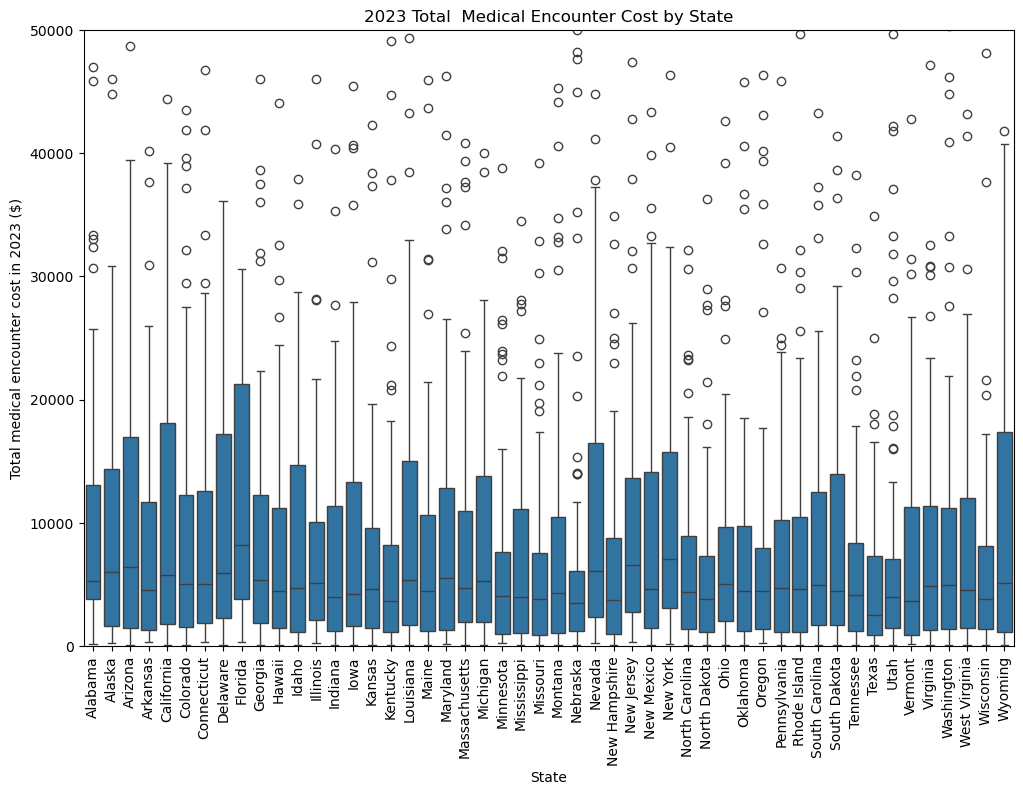

In [35]:
plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'STATE', y = 'encounters_cost', data = df)
plt.xticks(rotation='vertical')
plt.ylim(0, 50000)
plt.title('2023 Total  Medical Encounter Cost by State')
plt.ylabel('Total medical encounter cost in 2023 ($)')
plt.xlabel('State');

There are many high outliers, which agrees with what we saw in the right skewed histogram earlier. The median total medical encounter cost does not seem to vary too much between states.

Next, the number of encounters by state is visualized.

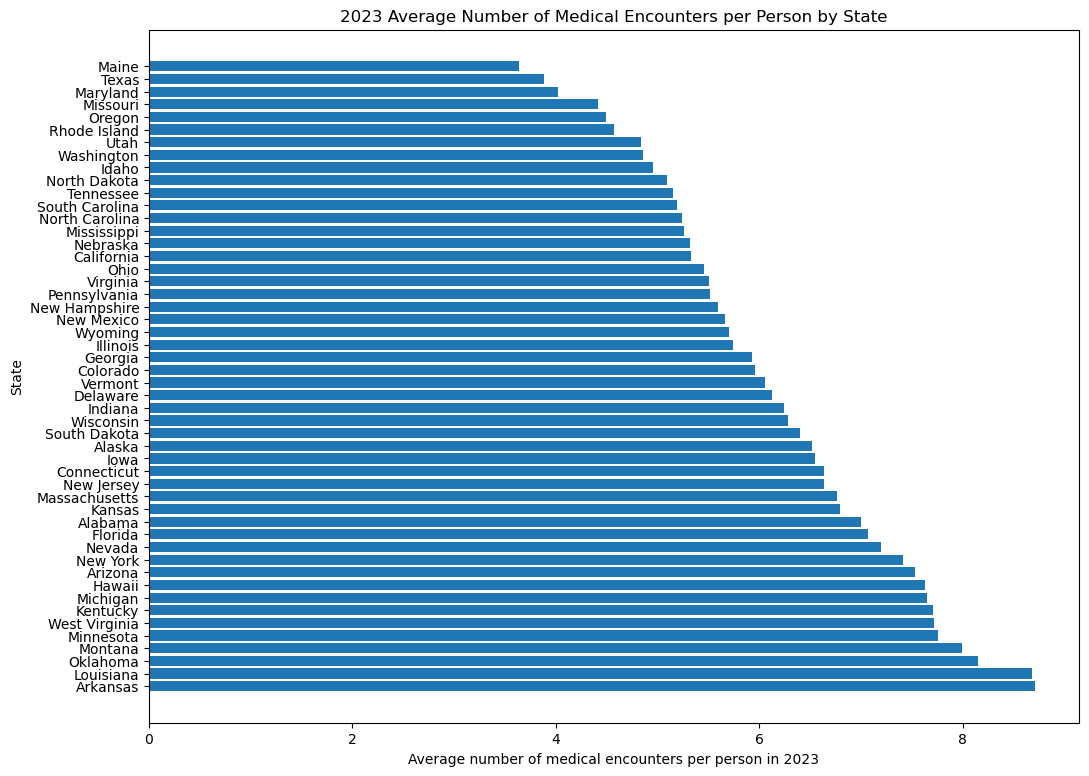

In [38]:
state_encounters_mean = df.groupby('STATE')['num_encounters'].mean()
state_encounters_mean = state_encounters_mean.reset_index().sort_values(by = 'num_encounters', ascending = False)
fig, ax = plt.subplots()
ax.barh(state_encounters_mean['STATE'], state_encounters_mean['num_encounters'])
ax.set_title('2023 Average Number of Medical Encounters per Person by State')
ax.set_xlabel('Average number of medical encounters per person in 2023')
ax.set_ylabel('State')
fig.set_size_inches(12, 9)
plt.show()

The average number of medical encounters per person in 2023 for all states appears to be within 3-9. Interestingly, Arkansas and Louisiana have the highest average number of medical encounters per person, but Arkansas has the 31st and Louisiana has the 9th average medical cost per person in 2023. To visualize the spread of the data, the data can be displayed with boxplots. The plot is truncated to the 0-20 range so we can see the boxplots more clearly.

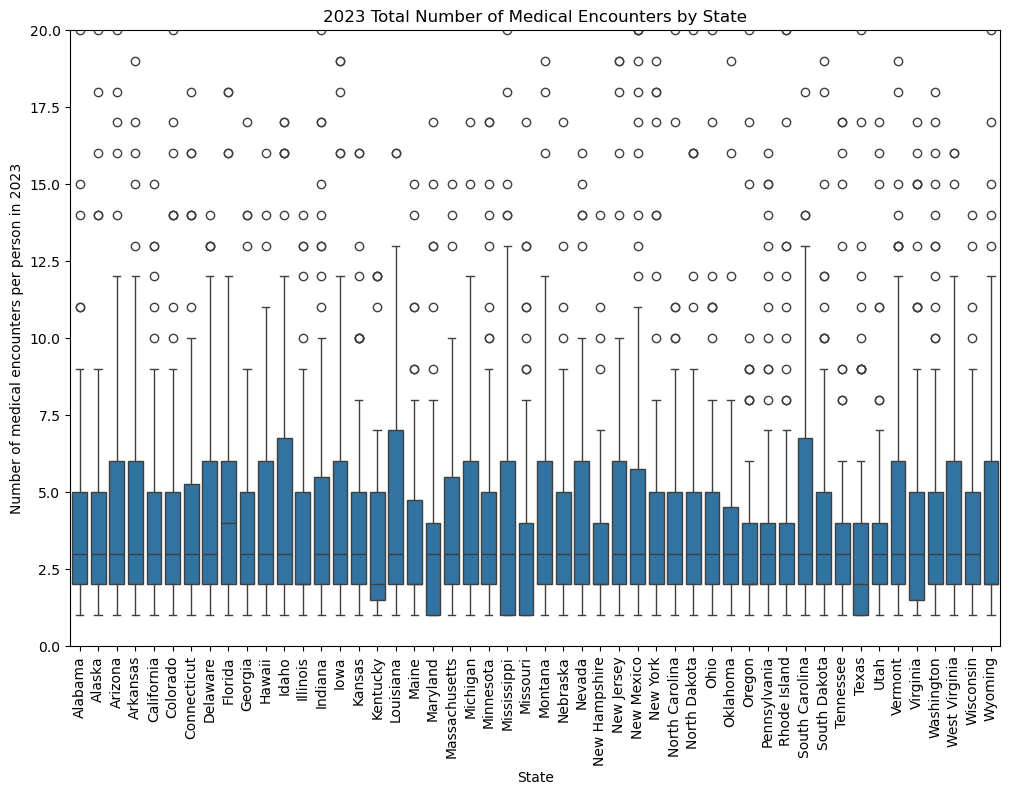

In [40]:
plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'STATE', y = 'num_encounters', data = df)
plt.xticks(rotation='vertical')
plt.ylim(0, 20)
plt.title('2023 Total Number of Medical Encounters by State')
plt.ylabel('Number of medical encounters per person in 2023')
plt.xlabel('State');

Again, we see that this data has a lot of higher outliers and is right skewed, confirming what we saw in the histogram. The median number of medical encounters does not seem to vary too much between states.

Now, we can look at medical cost by gender.

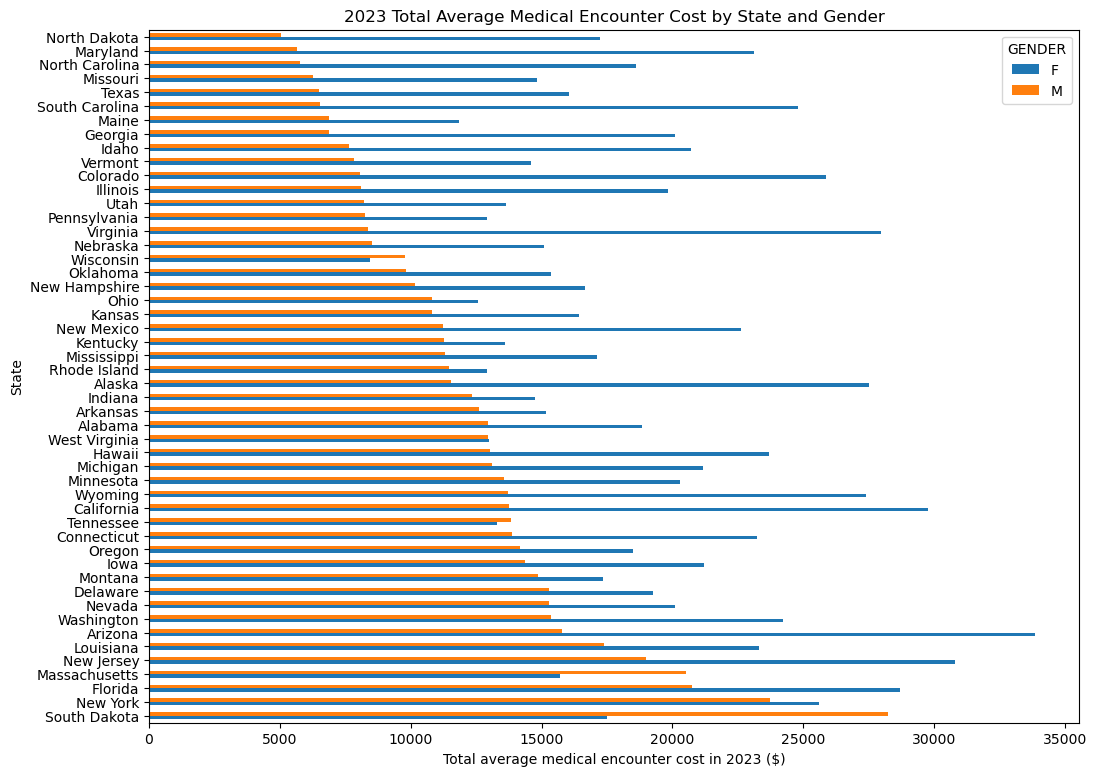

In [43]:
gender_cost_mean = df.groupby(['STATE', 'GENDER'])['encounters_cost'].mean()
gender_cost_mean = gender_cost_mean.reset_index()
gender_cost_mean = gender_cost_mean.pivot(index = 'STATE', columns = 'GENDER', values = 'encounters_cost')
gender_cost_mean = gender_cost_mean.sort_values(by = ['M', 'F'], ascending = False)
gender_cost_mean.plot(kind='barh', figsize = (12,9))
plt.title('2023 Total Average Medical Encounter Cost by State and Gender')
plt.xlabel('Total average medical encounter cost in 2023 ($)')
plt.ylabel('State')
plt.show()

When plotting medical cost by gender, we see that women tend to have higher total average medical costs in 2023 compared to men. Arizona has the highest total average medical cost for women, which may contribute to Arizona having the highest total average medical cost overall. South Dakota has the highest total average medical cost for men, which appears to be much higher than New York in 2nd place.

To visualize the spread of the data, the data can be displayed with boxplots. The plot is truncated to the $0-60,000 range so we can see the boxplots more clearly.

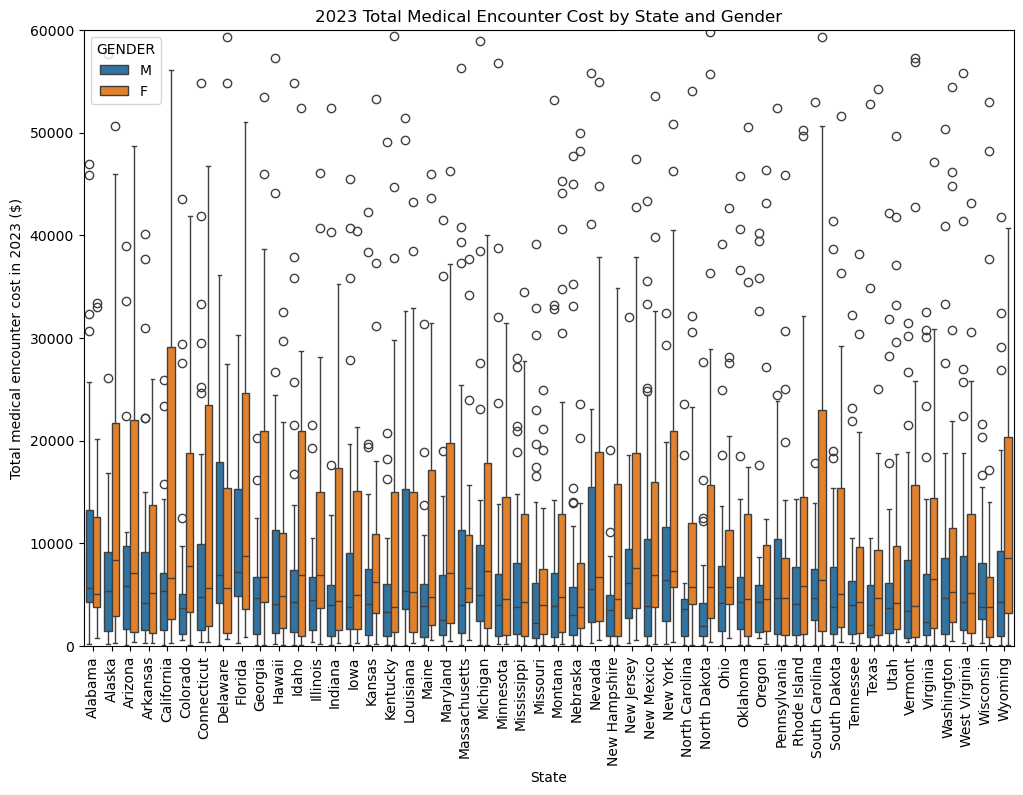

In [46]:
plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'STATE', y = 'encounters_cost', hue = 'GENDER', data = df)
plt.xticks(rotation='vertical')
plt.ylim(0, 60000)
plt.title('2023 Total Medical Encounter Cost by State and Gender')
plt.ylabel('Total medical encounter cost in 2023 ($)')
plt.xlabel('State');

As expected, the data is very right skewed with many high outliers. Women tend to have greater interquartile ranges and median values than men. Again, the median cost of medical encounters does not seem to vary as much between states and genders compared to the mean cost.

Now, the cost data can be visualized when grouped by race.

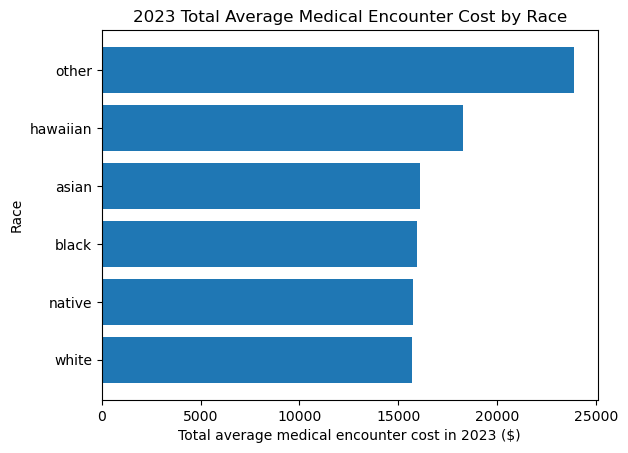

In [49]:
race_cost_mean = df.groupby('RACE')['encounters_cost'].mean()
race_cost_mean = race_cost_mean.reset_index().sort_values(by = 'encounters_cost')
fig, ax = plt.subplots()
ax.barh(race_cost_mean['RACE'], race_cost_mean['encounters_cost'])
ax.set_title('2023 Total Average Medical Encounter Cost by Race')
ax.set_xlabel('Total average medical encounter cost in 2023 ($)')
ax.set_ylabel('Race')
plt.show()

There does not seem to be a large difference between White, Native, Black, and Asian races. Hawaiian is slightly higher, and Other has the highest total average medical encounter cost.

Next, the medications csv file is loaded into the workspace. This contains information about which medications each patient is taking and how much they cost. The column titles and their data types are examined.

In [52]:
medications = pd.read_csv('used_data/medications.csv')
medications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401618 entries, 0 to 401617
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   START              401618 non-null  object 
 1   STOP               384725 non-null  object 
 2   PATIENT            401618 non-null  object 
 3   PAYER              401618 non-null  object 
 4   ENCOUNTER          401618 non-null  object 
 5   CODE               401618 non-null  int64  
 6   DESCRIPTION        401618 non-null  object 
 7   BASE_COST          401618 non-null  float64
 8   PAYER_COVERAGE     401618 non-null  float64
 9   DISPENSES          401618 non-null  int64  
 10  TOTALCOST          401618 non-null  float64
 11  REASONCODE         350366 non-null  float64
 12  REASONDESCRIPTION  350366 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 39.8+ MB


To get a better idea of what the dataframe looks like, the first 5 rows are examined.

In [54]:
medications.head()

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2020-10-30T07:38:01Z,2020-11-10T07:38:01Z,0e834632-ac19-f67a-a931-eeaad341af8a,df166300-5a78-3502-a46a-832842197811,4efaf5cf-d564-fbc8-cb91-aa0efb68813f,834061,Penicillin V Potassium 250 MG Oral Tablet,294.89,244.89,1,294.89,43878008.0,Streptococcal sore throat (disorder)
1,2019-10-16T09:12:53Z,2019-10-28T09:12:53Z,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,e03e23c9-4df1-3eb6-a62d-f70f02301496,8fe8cc4c-fd16-c4e7-c85f-517ef4946054,313782,Acetaminophen 325 MG Oral Tablet,398.37,0.00,1,398.37,10509002.0,Acute bronchitis (disorder)
2,2019-10-30T20:19:49Z,NaN,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,e03e23c9-4df1-3eb6-a62d-f70f02301496,72f5e755-f115-38e0-60ca-8ed145b7b463,310325,ferrous sulfate 325 MG Oral Tablet,0.33,0.00,59,19.47,NaN,NaN
3,2022-04-24T09:48:21Z,2022-05-02T09:48:21Z,0e834632-ac19-f67a-a931-eeaad341af8a,df166300-5a78-3502-a46a-832842197811,7dd6cda6-951f-0ec3-20ba-aac0e59f056a,313782,Acetaminophen 325 MG Oral Tablet,398.37,248.37,1,398.37,10509002.0,Acute bronchitis (disorder)
4,2021-01-16T20:02:59Z,2021-02-05T20:02:59Z,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,e03e23c9-4df1-3eb6-a62d-f70f02301496,48bb98bf-6281-84cd-0de1-d0cc3b16ff6d,849574,Naproxen sodium 220 MG Oral Tablet,230.59,0.00,1,230.59,NaN,NaN


The START column is the date and time when the patient started to take the medication, so this will be used as the timestamp for the medication. This column is converted into the python datetime format. For this project, one full year of medication data will be analyzed, so the data will be filtered for medications just in 2023.

In [56]:
medications['START'] = pd.to_datetime(medications['START'].astype(str).str.strip(), format='ISO8601')
medications_23 = medications[medications['START'].dt.year == 2023]

Next, the data is reformatted such that each row is a patient identifier and the columns contain the total medication cost and the total number of medications for each year. This format allows this dataframe to be merged with the filtered patients dataframe.

In [58]:
medications_cost = medications_23.groupby('PATIENT').agg(meds_cost = ('TOTALCOST', 'sum'), num_meds = ('TOTALCOST', 'count'))
medications_cost

,meds_cost,num_meds
PATIENT,,
00046c2b-9fdd-1bdd-bf5d-380cdca67299,2833.36,5
0033acc1-b2a4-081c-bea3-5c793b20095c,1746.32,9
004028c4-b13b-061f-04cd-65ad79f1a657,3230.90,42
005142a3-491b-68e0-3de5-5e2c7fbdb2fc,316.63,3
007b5f27-0bd2-9b30-90b7-051d0f5d560c,10859.10,2
...,...,...
ffb2a026-b770-678f-c0b1-09a5350f03bf,1948.41,2
ffc8051c-184e-791e-cfa7-b97409e4cfdc,6388.05,3
ffd77788-b723-1782-783b-26be3942b4bb,18972.27,3


The medications dataframe is merged with the patients dataframe to begin building up the dataframe for modeling in future sections of this capstone project.

In [60]:
df = df.merge(medications_cost, how = 'left', left_on = 'Id', right_on = 'PATIENT')
df

,Id,BIRTHDATE,SSN,FIRST,LAST,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,...,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME,AGE,encounters_cost,num_encounters,meds_cost,num_meds
0,0e834632-ac19-f67a-a931-eeaad341af8a,2020-04-01,999-73-9599,Berry486,Leannon79,white,nonhispanic,M,Huntsville Alabama US,463 Hagenes Dam Apt 15,...,33.539730,-86.036242,900.00,20136.45,21478,3,8748.80,4.0,NaN,NaN
1,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,1981-01-07,999-35-3783,Margarito178,Lockman863,white,nonhispanic,M,Birmingham Alabama US,413 Feest Track,...,33.591662,-86.403661,98921.73,0.00,89823,42,4659.91,5.0,14.90,2.0
2,bd670871-fcd9-6c34-6616-8faa27bccdfc,2000-07-09,999-17-6829,Chong355,Bergnaum523,white,nonhispanic,M,Huntsville Alabama US,175 Goodwin View,...,30.704774,-88.153451,44245.06,9334.53,54400,23,NaN,NaN,NaN,NaN
3,8208a9d1-02cb-3302-866e-9d0bd8f8ed67,2007-12-23,999-34-8090,Harry448,White193,black,nonhispanic,M,Holtville Alabama US,173 McLaughlin Track,...,33.418629,-86.692835,43520.86,1261.76,35376,16,2817.62,4.0,NaN,NaN
4,6286c263-7984-d01a-0228-9cd53c5aa010,1989-01-03,999-48-1638,Kieth891,Bartell116,white,nonhispanic,M,Huntsville Alabama US,702 Ryan Meadow Unit 70,...,34.685214,-86.852762,114453.55,1431.40,93837,34,4301.42,2.0,290.14,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,613f1c35-67dc-98df-2055-1f1435a62dd2,1938-09-12,999-41-9953,Dominique369,Erdman779,asian,nonhispanic,F,Powell Wyoming US,798 Weber Wall Unit 27,...,41.186693,-104.818492,376528.48,2519267.31,744167,85,40722.20,52.0,152527.39,364.0
4996,6f812221-030b-9b27-7a09-694eaf705bb7,1956-09-08,999-28-3421,Stacey209,Kihn564,white,nonhispanic,F,Urie Wyoming US,881 Dickens Avenue,...,41.161035,-104.824174,259970.29,1267448.07,24136,67,20535.90,13.0,5602.81,41.0
4997,53d3f1df-043e-f016-5fd2-8adcbfd6f9fc,1940-07-22,999-86-1535,Owen89,Pollich983,white,nonhispanic,M,Casper Wyoming US,790 Hegmann Junction,...,42.741628,-110.850109,290867.71,81699.96,117069,83,8780.74,9.0,848.67,8.0
4998,e415d6de-36b3-70c8-6e96-55232a481180,1936-09-22,999-92-2414,Wesley533,Reilly981,white,nonhispanic,M,Bairoil Wyoming US,610 Harber Wall,...,42.870966,-106.171144,204974.70,571755.51,130857,87,32392.04,21.0,14340.32,31.0


Next, the procedures csv file is loaded into the workspace. This contains information about procedures that have been performed on each patient and how much they cost. The column titles and their data types are examined.

In [62]:
procedures = pd.read_csv('used_data/procedures.csv')
procedures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103707 entries, 0 to 1103706
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   START              1103707 non-null  object 
 1   STOP               1103707 non-null  object 
 2   PATIENT            1103707 non-null  object 
 3   ENCOUNTER          1103707 non-null  object 
 4   SYSTEM             1103707 non-null  object 
 5   CODE               1103707 non-null  int64  
 6   DESCRIPTION        1103707 non-null  object 
 7   BASE_COST          1103707 non-null  float64
 8   REASONCODE         529254 non-null   float64
 9   REASONDESCRIPTION  529254 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 84.2+ MB


To get a better idea of what the dataframe looks like, the first 5 rows are examined.

In [64]:
procedures.head()

,START,STOP,PATIENT,ENCOUNTER,SYSTEM,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2020-04-01T20:38:01Z,2020-04-01T20:53:01Z,0e834632-ac19-f67a-a931-eeaad341af8a,93dcb4a5-0fda-5351-7916-9b60051c3bab,http://snomed.info/sct,430193006,Medication Reconciliation (procedure),313.92,NaN,NaN
1,2015-03-25T18:59:09Z,2015-03-25T19:45:29Z,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,71190f30-4ccc-721b-4084-729cf2410851,http://snomed.info/sct,710824005,Assessment of health and social care needs (pr...,459.10,NaN,NaN
2,2015-03-25T19:45:29Z,2015-03-25T20:02:07Z,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,71190f30-4ccc-721b-4084-729cf2410851,http://snomed.info/sct,710841007,Assessment of anxiety (procedure),459.10,NaN,NaN
3,2015-03-25T20:02:07Z,2015-03-25T20:42:39Z,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,71190f30-4ccc-721b-4084-729cf2410851,http://snomed.info/sct,866148006,Screening for domestic abuse (procedure),459.10,NaN,NaN
4,2015-03-25T20:42:39Z,2015-03-25T20:54:06Z,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,71190f30-4ccc-721b-4084-729cf2410851,http://snomed.info/sct,171207006,Depression screening (procedure),459.10,NaN,NaN


The START column is the date and time when the procedure began, so this will be used as the timestamp for the procedure. This column is converted into the python datetime format. For this project, one full year of procedure data will be analyzed, so the data will be filtered for procedures just in 2023.

In [66]:
procedures['START'] = pd.to_datetime(procedures['START'].astype(str).str.strip(), format='ISO8601')
procedures_23 = procedures[procedures['START'].dt.year == 2023]

Next, the data is reformatted such that each row is a patient identifier and the columns contain the total procedure cost and the total number of procedures for each year. This format allows this dataframe to be merged with the filtered patients dataframe.

In [68]:
procedures_cost = procedures_23.groupby('PATIENT').agg(procedures_cost = ('BASE_COST', 'sum'), num_procedures = ('BASE_COST', 'count'))
procedures_cost

,procedures_cost,num_procedures
PATIENT,,
00046c2b-9fdd-1bdd-bf5d-380cdca67299,14633.15,16
0009873a-380f-95c3-87b8-d225d63af8a1,488.78,1
0033acc1-b2a4-081c-bea3-5c793b20095c,18585.81,11
004028c4-b13b-061f-04cd-65ad79f1a657,42310.32,89
005142a3-491b-68e0-3de5-5e2c7fbdb2fc,8529.50,14
...,...,...
ffb2a026-b770-678f-c0b1-09a5350f03bf,4357.43,2
ffc8051c-184e-791e-cfa7-b97409e4cfdc,6698.02,14
ffd77788-b723-1782-783b-26be3942b4bb,121781.01,31


The procedures dataframe is merged with the patients dataframe to begin building up the dataframe for modeling in future sections of this capstone project.

In [70]:
df = df.merge(procedures_cost, how = 'left', left_on = 'Id', right_on = 'PATIENT')
df

,Id,BIRTHDATE,SSN,FIRST,LAST,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,...,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME,AGE,encounters_cost,num_encounters,meds_cost,num_meds,procedures_cost,num_procedures
0,0e834632-ac19-f67a-a931-eeaad341af8a,2020-04-01,999-73-9599,Berry486,Leannon79,white,nonhispanic,M,Huntsville Alabama US,463 Hagenes Dam Apt 15,...,900.00,20136.45,21478,3,8748.80,4.0,NaN,NaN,8263.80,17.0
1,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,1981-01-07,999-35-3783,Margarito178,Lockman863,white,nonhispanic,M,Birmingham Alabama US,413 Feest Track,...,98921.73,0.00,89823,42,4659.91,5.0,14.90,2.0,5968.30,13.0
2,bd670871-fcd9-6c34-6616-8faa27bccdfc,2000-07-09,999-17-6829,Chong355,Bergnaum523,white,nonhispanic,M,Huntsville Alabama US,175 Goodwin View,...,44245.06,9334.53,54400,23,NaN,NaN,NaN,NaN,NaN,NaN
3,8208a9d1-02cb-3302-866e-9d0bd8f8ed67,2007-12-23,999-34-8090,Harry448,White193,black,nonhispanic,M,Holtville Alabama US,173 McLaughlin Track,...,43520.86,1261.76,35376,16,2817.62,4.0,NaN,NaN,4109.91,11.0
4,6286c263-7984-d01a-0228-9cd53c5aa010,1989-01-03,999-48-1638,Kieth891,Bartell116,white,nonhispanic,M,Huntsville Alabama US,702 Ryan Meadow Unit 70,...,114453.55,1431.40,93837,34,4301.42,2.0,290.14,2.0,5368.22,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,613f1c35-67dc-98df-2055-1f1435a62dd2,1938-09-12,999-41-9953,Dominique369,Erdman779,asian,nonhispanic,F,Powell Wyoming US,798 Weber Wall Unit 27,...,376528.48,2519267.31,744167,85,40722.20,52.0,152527.39,364.0,78431.84,162.0
4996,6f812221-030b-9b27-7a09-694eaf705bb7,1956-09-08,999-28-3421,Stacey209,Kihn564,white,nonhispanic,F,Urie Wyoming US,881 Dickens Avenue,...,259970.29,1267448.07,24136,67,20535.90,13.0,5602.81,41.0,31294.94,65.0
4997,53d3f1df-043e-f016-5fd2-8adcbfd6f9fc,1940-07-22,999-86-1535,Owen89,Pollich983,white,nonhispanic,M,Casper Wyoming US,790 Hegmann Junction,...,290867.71,81699.96,117069,83,8780.74,9.0,848.67,8.0,14489.05,29.0
4998,e415d6de-36b3-70c8-6e96-55232a481180,1936-09-22,999-92-2414,Wesley533,Reilly981,white,nonhispanic,M,Bairoil Wyoming US,610 Harber Wall,...,204974.70,571755.51,130857,87,32392.04,21.0,14340.32,31.0,57566.66,118.0


Next, the immunizations csv file is loaded into the workspace. This contains information about which immunizations each patient has received and how much they cost. The column titles and their data types are examined.

In [72]:
immunizations = pd.read_csv('used_data/immunizations.csv')
immunizations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87561 entries, 0 to 87560
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         87561 non-null  object 
 1   PATIENT      87561 non-null  object 
 2   ENCOUNTER    87561 non-null  object 
 3   CODE         87561 non-null  int64  
 4   DESCRIPTION  87561 non-null  object 
 5   BASE_COST    87561 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.0+ MB


To get a better idea of what the dataframe looks like, the first 5 rows are examined.

In [74]:
immunizations.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
0,2020-04-01T20:38:01Z,0e834632-ac19-f67a-a931-eeaad341af8a,93dcb4a5-0fda-5351-7916-9b60051c3bab,8,Hep B adolescent or pediatric,136.0
1,2020-05-06T20:38:01Z,0e834632-ac19-f67a-a931-eeaad341af8a,bdda6dd0-9642-9404-767b-f1ca66721205,8,Hep B adolescent or pediatric,136.0
2,2020-07-08T20:38:01Z,0e834632-ac19-f67a-a931-eeaad341af8a,9e7d4ca9-533b-5d08-17e1-8a8a6439179b,49,Hib (PRP-OMP),136.0
3,2020-07-08T20:38:01Z,0e834632-ac19-f67a-a931-eeaad341af8a,9e7d4ca9-533b-5d08-17e1-8a8a6439179b,119,rotavirus monovalent,136.0
4,2020-07-08T20:38:01Z,0e834632-ac19-f67a-a931-eeaad341af8a,9e7d4ca9-533b-5d08-17e1-8a8a6439179b,10,IPV,136.0


The DATE column is the date and time when the patient was immunized, so this will be used as the timestamp for the immunization. This column is converted into the python datetime format. For this project, one full year of immunization data will be analyzed, so the data will be filtered for immunizations just in 2023.

In [76]:
immunizations['DATE'] = pd.to_datetime(immunizations['DATE'].astype(str).str.strip(), format='ISO8601')
immunizations_23 = immunizations[immunizations['DATE'].dt.year == 2023]

Next, the data is reformatted such that each row is a patient identifier and the columns contain the total immunization cost and the total number of immunizations for each year. This format allows this dataframe to be merged with the filtered patients dataframe.

In [78]:
immunizations_cost = immunizations_23.groupby('PATIENT').agg(immunizations_cost = ('BASE_COST', 'sum'), num_immunizations = ('BASE_COST', 'count'))
immunizations_cost

,immunizations_cost,num_immunizations
PATIENT,,
00046c2b-9fdd-1bdd-bf5d-380cdca67299,272.0,2
0009873a-380f-95c3-87b8-d225d63af8a1,544.0,4
004028c4-b13b-061f-04cd-65ad79f1a657,136.0,1
005142a3-491b-68e0-3de5-5e2c7fbdb2fc,272.0,2
007b5f27-0bd2-9b30-90b7-051d0f5d560c,136.0,1
...,...,...
ffb2a026-b770-678f-c0b1-09a5350f03bf,136.0,1
ffc8051c-184e-791e-cfa7-b97409e4cfdc,136.0,1
ffd77788-b723-1782-783b-26be3942b4bb,272.0,2


The immunizations dataframe is merged with the patients dataframe to begin building up the dataframe for modeling in future sections of this capstone project.

In [80]:
df = df.merge(immunizations_cost, how = 'left', left_on = 'Id', right_on = 'PATIENT')
df

,Id,BIRTHDATE,SSN,FIRST,LAST,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,...,INCOME,AGE,encounters_cost,num_encounters,meds_cost,num_meds,procedures_cost,num_procedures,immunizations_cost,num_immunizations
0,0e834632-ac19-f67a-a931-eeaad341af8a,2020-04-01,999-73-9599,Berry486,Leannon79,white,nonhispanic,M,Huntsville Alabama US,463 Hagenes Dam Apt 15,...,21478,3,8748.80,4.0,NaN,NaN,8263.80,17.0,136.0,1.0
1,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,1981-01-07,999-35-3783,Margarito178,Lockman863,white,nonhispanic,M,Birmingham Alabama US,413 Feest Track,...,89823,42,4659.91,5.0,14.90,2.0,5968.30,13.0,408.0,3.0
2,bd670871-fcd9-6c34-6616-8faa27bccdfc,2000-07-09,999-17-6829,Chong355,Bergnaum523,white,nonhispanic,M,Huntsville Alabama US,175 Goodwin View,...,54400,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8208a9d1-02cb-3302-866e-9d0bd8f8ed67,2007-12-23,999-34-8090,Harry448,White193,black,nonhispanic,M,Holtville Alabama US,173 McLaughlin Track,...,35376,16,2817.62,4.0,NaN,NaN,4109.91,11.0,272.0,2.0
4,6286c263-7984-d01a-0228-9cd53c5aa010,1989-01-03,999-48-1638,Kieth891,Bartell116,white,nonhispanic,M,Huntsville Alabama US,702 Ryan Meadow Unit 70,...,93837,34,4301.42,2.0,290.14,2.0,5368.22,12.0,136.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,613f1c35-67dc-98df-2055-1f1435a62dd2,1938-09-12,999-41-9953,Dominique369,Erdman779,asian,nonhispanic,F,Powell Wyoming US,798 Weber Wall Unit 27,...,744167,85,40722.20,52.0,152527.39,364.0,78431.84,162.0,136.0,1.0
4996,6f812221-030b-9b27-7a09-694eaf705bb7,1956-09-08,999-28-3421,Stacey209,Kihn564,white,nonhispanic,F,Urie Wyoming US,881 Dickens Avenue,...,24136,67,20535.90,13.0,5602.81,41.0,31294.94,65.0,136.0,1.0
4997,53d3f1df-043e-f016-5fd2-8adcbfd6f9fc,1940-07-22,999-86-1535,Owen89,Pollich983,white,nonhispanic,M,Casper Wyoming US,790 Hegmann Junction,...,117069,83,8780.74,9.0,848.67,8.0,14489.05,29.0,136.0,1.0
4998,e415d6de-36b3-70c8-6e96-55232a481180,1936-09-22,999-92-2414,Wesley533,Reilly981,white,nonhispanic,M,Bairoil Wyoming US,610 Harber Wall,...,130857,87,32392.04,21.0,14340.32,31.0,57566.66,118.0,136.0,1.0


Next, the allergies csv file is loaded into the workspace. This contains information about what kinds of allergies each patient has. The column titles and their data types are examined.

In [82]:
allergies = pd.read_csv('used_data/allergies.csv')
allergies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5542 entries, 0 to 5541
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   START         5542 non-null   object 
 1   STOP          0 non-null      float64
 2   PATIENT       5542 non-null   object 
 3   ENCOUNTER     5542 non-null   object 
 4   CODE          5542 non-null   int64  
 5   SYSTEM        5542 non-null   object 
 6   DESCRIPTION   5542 non-null   object 
 7   TYPE          5542 non-null   object 
 8   CATEGORY      5542 non-null   object 
 9   REACTION1     2421 non-null   float64
 10  DESCRIPTION1  2421 non-null   object 
 11  SEVERITY1     2421 non-null   object 
 12  REACTION2     1489 non-null   float64
 13  DESCRIPTION2  1489 non-null   object 
 14  SEVERITY2     1489 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 649.6+ KB


To get a better idea of what the dataframe looks like, the first 5 rows are examined.

In [84]:
allergies.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,SYSTEM,DESCRIPTION,TYPE,CATEGORY,REACTION1,DESCRIPTION1,SEVERITY1,REACTION2,DESCRIPTION2,SEVERITY2
0,1976-11-29,NaN,7efd1aea-aa7e-9e8c-32f7-b91af9aa15e4,77a4b25c-6908-3211-568d-24205a5cf654,419199007,SNOMED-CT,Allergy to substance (finding),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
1,1976-11-29,NaN,7efd1aea-aa7e-9e8c-32f7-b91af9aa15e4,77a4b25c-6908-3211-568d-24205a5cf654,29046,RxNorm,Lisinopril,intolerance,medication,NaN,NaN,NaN,NaN,NaN,NaN
2,1976-11-29,NaN,7efd1aea-aa7e-9e8c-32f7-b91af9aa15e4,77a4b25c-6908-3211-568d-24205a5cf654,762952008,SNOMED-CT,Peanut (substance),allergy,food,247472004.0,Wheal (finding),MODERATE,271807003.0,Eruption of skin (disorder),MILD
3,1987-11-11,NaN,aa8f361e-be82-90b8-6d66-0057485554cc,349b837f-206e-09e9-f630-a511f42c29f8,419199007,SNOMED-CT,Allergy to substance (finding),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
4,1987-11-11,NaN,aa8f361e-be82-90b8-6d66-0057485554cc,349b837f-206e-09e9-f630-a511f42c29f8,288328004,SNOMED-CT,Bee venom (substance),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN


Next, the data is reformatted such that each row is a patient identifier and the columns contain the total number of allergies each patient has. This format allows this dataframe to be merged with the filtered patients dataframe.

In [86]:
num_allergies = allergies.groupby('PATIENT').agg(num_allergies = ('TYPE', 'count'))
num_allergies

,num_allergies
PATIENT,
0009873a-380f-95c3-87b8-d225d63af8a1,8
00950b99-a576-f82a-925e-429fe6ecf51d,9
009e6f6c-68ad-0fb7-ca75-ab82548e9e2a,7
00ddae20-6ad7-e18f-75fc-6ba90a381994,7
010996ca-eaa5-b529-5609-94dee8d9196b,9
...,...
ff2dbf10-43d5-4fd8-c139-dad9eab60462,7
ff48b8df-b313-5edb-0ffb-66ecf4e990d9,4
ff6fa16f-6d6a-0393-caa8-581a0e3c274d,4


The allergies dataframe is merged with the patients dataframe to begin building up the dataframe for modeling in future sections of this capstone project.

In [88]:
df = df.merge(num_allergies, how = 'left', left_on = 'Id', right_on = 'PATIENT')
df

,Id,BIRTHDATE,SSN,FIRST,LAST,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,...,AGE,encounters_cost,num_encounters,meds_cost,num_meds,procedures_cost,num_procedures,immunizations_cost,num_immunizations,num_allergies
0,0e834632-ac19-f67a-a931-eeaad341af8a,2020-04-01,999-73-9599,Berry486,Leannon79,white,nonhispanic,M,Huntsville Alabama US,463 Hagenes Dam Apt 15,...,3,8748.80,4.0,NaN,NaN,8263.80,17.0,136.0,1.0,NaN
1,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,1981-01-07,999-35-3783,Margarito178,Lockman863,white,nonhispanic,M,Birmingham Alabama US,413 Feest Track,...,42,4659.91,5.0,14.90,2.0,5968.30,13.0,408.0,3.0,NaN
2,bd670871-fcd9-6c34-6616-8faa27bccdfc,2000-07-09,999-17-6829,Chong355,Bergnaum523,white,nonhispanic,M,Huntsville Alabama US,175 Goodwin View,...,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8208a9d1-02cb-3302-866e-9d0bd8f8ed67,2007-12-23,999-34-8090,Harry448,White193,black,nonhispanic,M,Holtville Alabama US,173 McLaughlin Track,...,16,2817.62,4.0,NaN,NaN,4109.91,11.0,272.0,2.0,NaN
4,6286c263-7984-d01a-0228-9cd53c5aa010,1989-01-03,999-48-1638,Kieth891,Bartell116,white,nonhispanic,M,Huntsville Alabama US,702 Ryan Meadow Unit 70,...,34,4301.42,2.0,290.14,2.0,5368.22,12.0,136.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,613f1c35-67dc-98df-2055-1f1435a62dd2,1938-09-12,999-41-9953,Dominique369,Erdman779,asian,nonhispanic,F,Powell Wyoming US,798 Weber Wall Unit 27,...,85,40722.20,52.0,152527.39,364.0,78431.84,162.0,136.0,1.0,NaN
4996,6f812221-030b-9b27-7a09-694eaf705bb7,1956-09-08,999-28-3421,Stacey209,Kihn564,white,nonhispanic,F,Urie Wyoming US,881 Dickens Avenue,...,67,20535.90,13.0,5602.81,41.0,31294.94,65.0,136.0,1.0,NaN
4997,53d3f1df-043e-f016-5fd2-8adcbfd6f9fc,1940-07-22,999-86-1535,Owen89,Pollich983,white,nonhispanic,M,Casper Wyoming US,790 Hegmann Junction,...,83,8780.74,9.0,848.67,8.0,14489.05,29.0,136.0,1.0,NaN
4998,e415d6de-36b3-70c8-6e96-55232a481180,1936-09-22,999-92-2414,Wesley533,Reilly981,white,nonhispanic,M,Bairoil Wyoming US,610 Harber Wall,...,87,32392.04,21.0,14340.32,31.0,57566.66,118.0,136.0,1.0,NaN


Next, the observations csv file is loaded into the workspace. This contains information about medical test results, routine health observations, and questions doctors may ask their patients. The column titles and their data types are examined.

In [90]:
observations = pd.read_csv('used_data/observations.csv')
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5646893 entries, 0 to 5646892
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   DATE         object
 1   PATIENT      object
 2   ENCOUNTER    object
 3   CATEGORY     object
 4   CODE         object
 5   DESCRIPTION  object
 6   VALUE        object
 7   UNITS        object
 8   TYPE         object
dtypes: object(9)
memory usage: 387.7+ MB


To get a better idea of what the dataframe looks like, the first 5 rows are examined.

In [92]:
observations.head()

,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2020-04-01T20:38:01Z,0e834632-ac19-f67a-a931-eeaad341af8a,93dcb4a5-0fda-5351-7916-9b60051c3bab,vital-signs,8302-2,Body Height,50.7,cm,numeric
1,2015-03-25T18:59:09Z,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,71190f30-4ccc-721b-4084-729cf2410851,vital-signs,8302-2,Body Height,178.6,cm,numeric
2,2020-04-01T20:38:01Z,0e834632-ac19-f67a-a931-eeaad341af8a,93dcb4a5-0fda-5351-7916-9b60051c3bab,vital-signs,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,1.0,{score},numeric
3,2020-04-01T20:38:01Z,0e834632-ac19-f67a-a931-eeaad341af8a,93dcb4a5-0fda-5351-7916-9b60051c3bab,vital-signs,29463-7,Body Weight,3.3,kg,numeric
4,2020-04-01T20:38:01Z,0e834632-ac19-f67a-a931-eeaad341af8a,93dcb4a5-0fda-5351-7916-9b60051c3bab,vital-signs,77606-2,Weight-for-length Per age and sex,12.8,%,numeric


Each value in the DESCRIPTION column is a type of observation made, so we can check how many different types of observations there are in the entire dataset.

In [94]:
len(pd.unique(observations['DESCRIPTION']))

305

The DATE column is the date and time when the observation was recorded, so this will be used as the timestamp for the observation. This column is converted into the python datetime format. Additionally, since we are only looking at data before or from 2023, any observations recorded after 2023 will be filtered out.

In [96]:
observations['DATE'] = pd.to_datetime(observations['DATE'].astype(str).str.strip(), format='ISO8601')
observations_23 = observations[observations['DATE'].dt.year <= 2023]
observations_23

,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2020-04-01 20:38:01+00:00,0e834632-ac19-f67a-a931-eeaad341af8a,93dcb4a5-0fda-5351-7916-9b60051c3bab,vital-signs,8302-2,Body Height,50.7,cm,numeric
1,2015-03-25 18:59:09+00:00,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,71190f30-4ccc-721b-4084-729cf2410851,vital-signs,8302-2,Body Height,178.6,cm,numeric
2,2020-04-01 20:38:01+00:00,0e834632-ac19-f67a-a931-eeaad341af8a,93dcb4a5-0fda-5351-7916-9b60051c3bab,vital-signs,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,1.0,{score},numeric
3,2020-04-01 20:38:01+00:00,0e834632-ac19-f67a-a931-eeaad341af8a,93dcb4a5-0fda-5351-7916-9b60051c3bab,vital-signs,29463-7,Body Weight,3.3,kg,numeric
4,2020-04-01 20:38:01+00:00,0e834632-ac19-f67a-a931-eeaad341af8a,93dcb4a5-0fda-5351-7916-9b60051c3bab,vital-signs,77606-2,Weight-for-length Per age and sex,12.8,%,numeric
...,...,...,...,...,...,...,...,...,...
5646888,2019-12-06 16:25:10+00:00,6005db0c-a6ae-e95c-1d3b-f7ee7bfb6f5d,NaN,NaN,QOLS,QOLS,0.9,{score},numeric
5646889,2020-12-06 16:25:10+00:00,6005db0c-a6ae-e95c-1d3b-f7ee7bfb6f5d,NaN,NaN,QOLS,QOLS,0.9,{score},numeric
5646890,2021-12-06 16:25:10+00:00,6005db0c-a6ae-e95c-1d3b-f7ee7bfb6f5d,NaN,NaN,QOLS,QOLS,0.9,{score},numeric
5646891,2022-12-06 16:25:10+00:00,6005db0c-a6ae-e95c-1d3b-f7ee7bfb6f5d,NaN,NaN,QOLS,QOLS,0.8,{score},numeric


For this study, we will look at the most recent observations for each patient. So, the dataframe is first sorted such that the most oldest observations are at the top and the most recent observations are at the bottom. Then, it is checked for any duplicate observations for each patient, and the last (or most recent) one will be kept.

In [98]:
observations_23 = observations_23.sort_values('DATE', ascending = True)
obs_drop = observations_23.drop_duplicates(['PATIENT', 'DESCRIPTION'], keep = 'last')
obs_drop

,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
3787962,1918-01-22 11:05:37+00:00,e09333b7-c04c-16dd-560b-c97edf0bb299,ff783d26-d109-cdd7-6e5a-658d7aaa6e18,vital-signs,9843-4,Head Occipital-frontal circumference,52.4,cm,numeric
3787961,1918-01-22 11:05:37+00:00,e09333b7-c04c-16dd-560b-c97edf0bb299,ff783d26-d109-cdd7-6e5a-658d7aaa6e18,vital-signs,8289-1,Head Occipital-frontal circumference Percentile,100.0,%,numeric
3787960,1918-01-22 11:05:37+00:00,e09333b7-c04c-16dd-560b-c97edf0bb299,ff783d26-d109-cdd7-6e5a-658d7aaa6e18,vital-signs,77606-2,Weight-for-length Per age and sex,99.0,%,numeric
3347809,1922-05-08 07:10:53+00:00,308f59d6-352d-b605-7b61-f28cc7c59d1b,1afaf3b3-708d-bd74-e793-215b6d32058b,vital-signs,9843-4,Head Occipital-frontal circumference,47.9,cm,numeric
3347808,1922-05-08 07:10:53+00:00,308f59d6-352d-b605-7b61-f28cc7c59d1b,1afaf3b3-708d-bd74-e793-215b6d32058b,vital-signs,8289-1,Head Occipital-frontal circumference Percentile,13.8,%,numeric
...,...,...,...,...,...,...,...,...,...
135600,2023-12-31 23:28:10+00:00,59bfae1d-a458-547b-f679-f7b909846d3e,c18071a2-1fe3-75f5-857d-d862a1174b84,survey,55758-7,Patient Health Questionnaire 2 item (PHQ-2) to...,1.0,{score},numeric
4648767,2023-12-31 23:35:38+00:00,5e37e9e8-f4c2-a974-57ad-a275185d4581,d54286b2-0fd0-27e4-78cb-ed146f7503ec,survey,89204-2,Patient Health Questionnaire-9: Modified for T...,3.0,{score},numeric
1436921,2023-12-31 23:39:36+00:00,544d7a57-02ac-dbe3-f8a4-e638b4c176e6,c8f71884-278a-6a04-dc0c-1fa80016b102,survey,76504-0,Total score [HARK],0.0,{score},numeric
992850,2023-12-31 23:48:21+00:00,7727926f-a489-f04d-050f-bb5970a28001,48cfb05e-27ac-0e57-9f9c-fa6e9fcac056,survey,70274-6,Generalized anxiety disorder 7 item (GAD-7) to...,4.0,{score},numeric


The dataframe contains a column TYPE indicating if the observation is text or numeric. Any numeric observations are converted into floats.

In [100]:
obs_drop['VALUE'] = obs_drop.apply(lambda row: float(row['VALUE']) if row['TYPE'] == 'numeric' else row['VALUE'], axis=1)

Next, the dataframe is pivoted such that each patient is a row and each column is an observation

In [102]:
obs_pivot = obs_drop.pivot(index='PATIENT', columns='DESCRIPTION', values='VALUE')
obs_pivot

DESCRIPTION,A great deal of time is spent in activities necessary to obtain the opioid use the opioid or recover from its effects,ALT (Elevated),AST (Elevated),Abuse Status [OMAHA],Activated clotting time (ACT) of Blood by Coagulation assay,Activities of daily living score [KOOS],Address,Adenovirus A+B+C+D+E DNA [Presence] in Respiratory specimen by NAA with probe detection,Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma,Albumin,...,What number best describes how pain has interfered with your general activity during the past week,What was your best estimate of the total income of all family members from all sources before taxes in last year?,Wheat IgE Ab [Units/volume] in Serum,White oak IgE Ab [Units/volume] in Serum,Withdrawal * as manifested by either of the following: a) Characteristic opioid withdrawal syndrome b) Same (or a closely related) substance is taken to relieve or avoid withdrawal symptoms,Within the last year have you been afraid of your partner or ex-partner?,aPTT in Blood by Coagulation assay,pH of Arterial blood,pH of Urine by Test strip,pH of Venous blood
PATIENT,,,,,,,,,,,,,,,,,,,,,
00046c2b-9fdd-1bdd-bf5d-380cdca67299,NaN,NaN,NaN,NaN,NaN,NaN,564 Hagenes Mall,NaN,NaN,NaN,...,2.9,80056,NaN,NaN,NaN,No,NaN,NaN,6.6,NaN
0009873a-380f-95c3-87b8-d225d63af8a1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0033acc1-b2a4-081c-bea3-5c793b20095c,NaN,NaN,NaN,NaN,NaN,NaN,644 Donnelly Light Unit 59,NaN,25.6,NaN,...,2.0,462619,NaN,NaN,NaN,No,27.1,NaN,5.1,NaN
004028c4-b13b-061f-04cd-65ad79f1a657,NaN,NaN,NaN,NaN,NaN,NaN,397 Bins Parade Suite 23,NaN,NaN,NaN,...,NaN,145239,NaN,NaN,NaN,No,NaN,NaN,6.1,NaN
005142a3-491b-68e0-3de5-5e2c7fbdb2fc,NaN,NaN,NaN,NaN,NaN,NaN,209 Kutch Loaf,NaN,31.2,NaN,...,NaN,35282,NaN,NaN,NaN,No,27.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb2a026-b770-678f-c0b1-09a5350f03bf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffc8051c-184e-791e-cfa7-b97409e4cfdc,NaN,NaN,NaN,NaN,NaN,NaN,992 Stoltenberg Mill Unit 87,NaN,NaN,NaN,...,NaN,22294,NaN,NaN,NaN,No,NaN,NaN,5.0,NaN
ffd77788-b723-1782-783b-26be3942b4bb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.1,NaN,NaN,NaN,NaN,6.9,NaN


The data is again converted into its proper data types to make sure they are correct.

In [104]:
obs_pivot = obs_pivot.convert_dtypes()
obs_pivot.dtypes

DESCRIPTION
A great deal of time is spent in activities necessary to obtain the opioid  use the opioid  or recover from its effects           Float64
ALT (Elevated)                                                                                                                    Float64
AST (Elevated)                                                                                                                    Float64
Abuse Status [OMAHA]                                                                                                       string[python]
Activated clotting time (ACT) of Blood by Coagulation assay                                                                       Float64
                                                                                                                                ...      
Within the last year  have you been afraid of your partner or ex-partner?                                                  string[python]
aPTT in Blood by Coagu

There seem to be a lot of missing observations, so the count and and percentage of missing observations are visualized.

In [106]:
missing_obs = pd.concat([obs_pivot.isnull().sum(), 100 * obs_pivot.isnull().mean()], axis=1)
missing_obs.columns = ['count', '%']
missing_obs.sort_values(by = 'count', ascending = False)

,count,%
DESCRIPTION,,
Pain score [KOOS],5832,99.982856
PROMIS-29 Depression score,5832,99.982856
PROMIS-29 Anxiety score,5832,99.982856
PROMIS-29 Sleep disturbance score,5832,99.982856
Sport-recreation score [KOOS],5832,99.982856
...,...,...
Tobacco smoking status,0,0.000000
Systolic Blood Pressure,0,0.000000
Body Height,0,0.000000


The dataframe is filtered for columns where there are no more than 90% missing values.

In [108]:
col_list_90 = [col for col in obs_pivot if 100 * obs_pivot.isnull().mean()[col] <= 90]
obs_filtered_90 = obs_pivot[col_list_90]
obs_filtered_90

DESCRIPTION,Address,Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma,Albumin [Mass/volume] in Serum or Plasma,Alkaline phosphatase [Enzymatic activity/volume] in Serum or Plasma,Appearance of Urine,Are you a refugee?,Are you worried about losing your housing?,Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma,At any point in the past 2 years has season or migrant farm work been your or your family's main source of income?,Bilirubin.total [Mass/volume] in Serum or Plasma,...,Total score [AUDIT-C],Total score [DAST-10],Total score [HARK],Triglycerides,Urea nitrogen [Mass/volume] in Blood,Urea nitrogen [Mass/volume] in Serum or Plasma,Weight-for-length Per age and sex,What was your best estimate of the total income of all family members from all sources before taxes in last year?,Within the last year have you been afraid of your partner or ex-partner?,pH of Urine by Test strip
PATIENT,,,,,,,,,,,,,,,,,,,,,
00046c2b-9fdd-1bdd-bf5d-380cdca67299,564 Hagenes Mall,<NA>,<NA>,<NA>,<NA>,No,No,<NA>,No,<NA>,...,1,2,0,<NA>,<NA>,<NA>,<NA>,80056,No,6.6
0009873a-380f-95c3-87b8-d225d63af8a1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,88.7,<NA>,<NA>,<NA>
0033acc1-b2a4-081c-bea3-5c793b20095c,644 Donnelly Light Unit 59,25.6,3.8,61.6,Cloudy urine (finding),No,No,17.2,No,12.2,...,2,1,0,355.8,<NA>,14.4,<NA>,462619,No,5.1
004028c4-b13b-061f-04cd-65ad79f1a657,397 Bins Parade Suite 23,<NA>,<NA>,<NA>,Cloudy urine (finding),No,No,<NA>,No,<NA>,...,<NA>,<NA>,0,135.1,<NA>,19.4,<NA>,145239,No,6.1
005142a3-491b-68e0-3de5-5e2c7fbdb2fc,209 Kutch Loaf,31.2,3.8,61.8,<NA>,No,No,30.7,No,6.3,...,1,1,0,104.7,<NA>,14.7,<NA>,35282,No,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb2a026-b770-678f-c0b1-09a5350f03bf,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,90.0,<NA>,<NA>,<NA>
ffc8051c-184e-791e-cfa7-b97409e4cfdc,992 Stoltenberg Mill Unit 87,<NA>,<NA>,<NA>,Cloudy urine (finding),No,No,<NA>,Yes,<NA>,...,1,1,0,116.1,13.3,13.3,<NA>,22294,No,5.0
ffd77788-b723-1782-783b-26be3942b4bb,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,17.6,<NA>,<NA>,<NA>,6.9


This reduces the dataset from 305 columns to 107 columns. For visualization, the dataframe is filtered for columns where there are no missing values.

In [110]:
col_list = [col for col in obs_pivot if obs_pivot.isna().sum()[col] == 0]
obs_filtered_0 = obs_pivot[col_list]
obs_filtered_0

DESCRIPTION,Body Height,Body Weight,Diastolic Blood Pressure,Erythrocyte distribution width [Entitic volume] by Automated count,Erythrocytes [#/volume] in Blood by Automated count,Heart rate,Hematocrit [Volume Fraction] of Blood by Automated count,Hemoglobin [Mass/volume] in Blood,Leukocytes [#/volume] in Blood by Automated count,MCH [Entitic mass] by Automated count,MCHC [Mass/volume] by Automated count,MCV [Entitic volume] by Automated count,Pain severity - 0-10 verbal numeric rating [Score] - Reported,Platelet distribution width [Entitic volume] in Blood by Automated count,Platelet mean volume [Entitic volume] in Blood by Automated count,Platelets [#/volume] in Blood by Automated count,Respiratory rate,Systolic Blood Pressure,Tobacco smoking status
PATIENT,,,,,,,,,,,,,,,,,,,
00046c2b-9fdd-1bdd-bf5d-380cdca67299,162.2,64.9,105.0,40.6,5.0,80.0,42.9,12.5,6.8,28.7,33.8,87.7,1,483.9,9.6,442.3,15.0,137.0,Never smoked tobacco (finding)
0009873a-380f-95c3-87b8-d225d63af8a1,149.0,43.4,73.0,40.0,4.9,61.0,44.5,12.1,6.6,29.2,34.6,88.2,1,367.6,10.4,438.7,14.0,125.0,Never smoked tobacco (finding)
0033acc1-b2a4-081c-bea3-5c793b20095c,161.5,79.8,107.0,45.5,5.2,98.0,41.0,11.4,3.6,32.1,35.3,93.9,1,397.8,9.9,118.5,14.0,138.0,Never smoked tobacco (finding)
004028c4-b13b-061f-04cd-65ad79f1a657,186.0,94.3,52.0,45.9,5.2,87.0,41.9,16.8,4.5,30.4,35.4,86.4,1,473.4,10.0,348.1,14.0,94.0,Never smoked tobacco (finding)
005142a3-491b-68e0-3de5-5e2c7fbdb2fc,167.7,77.3,82.0,42.6,4.8,85.0,39.7,12.7,4.8,27.1,34.1,89.6,1,407.7,11.7,401.7,15.0,120.0,Never smoked tobacco (finding)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffb2a026-b770-678f-c0b1-09a5350f03bf,133.4,29.7,90.0,43.1,5.0,80.0,40.4,12.2,4.6,32.5,35.6,88.2,1,436.5,11.8,429.9,15.0,117.0,Never smoked tobacco (finding)
ffc8051c-184e-791e-cfa7-b97409e4cfdc,167.5,84.6,69.0,43.0,4.5,66.0,38.0,15.4,4.0,31.7,34.5,81.7,3,514.8,10.1,250.8,14.0,119.0,Ex-smoker (finding)
ffd77788-b723-1782-783b-26be3942b4bb,167.0,61.3,81.0,45.5,4.1,65.0,45.3,12.3,4.8,31.4,33.5,94.9,1,455.7,11.5,378.3,13.0,110.0,Never smoked tobacco (finding)


Histograms of the observations with no missing values are created to visualize the data.

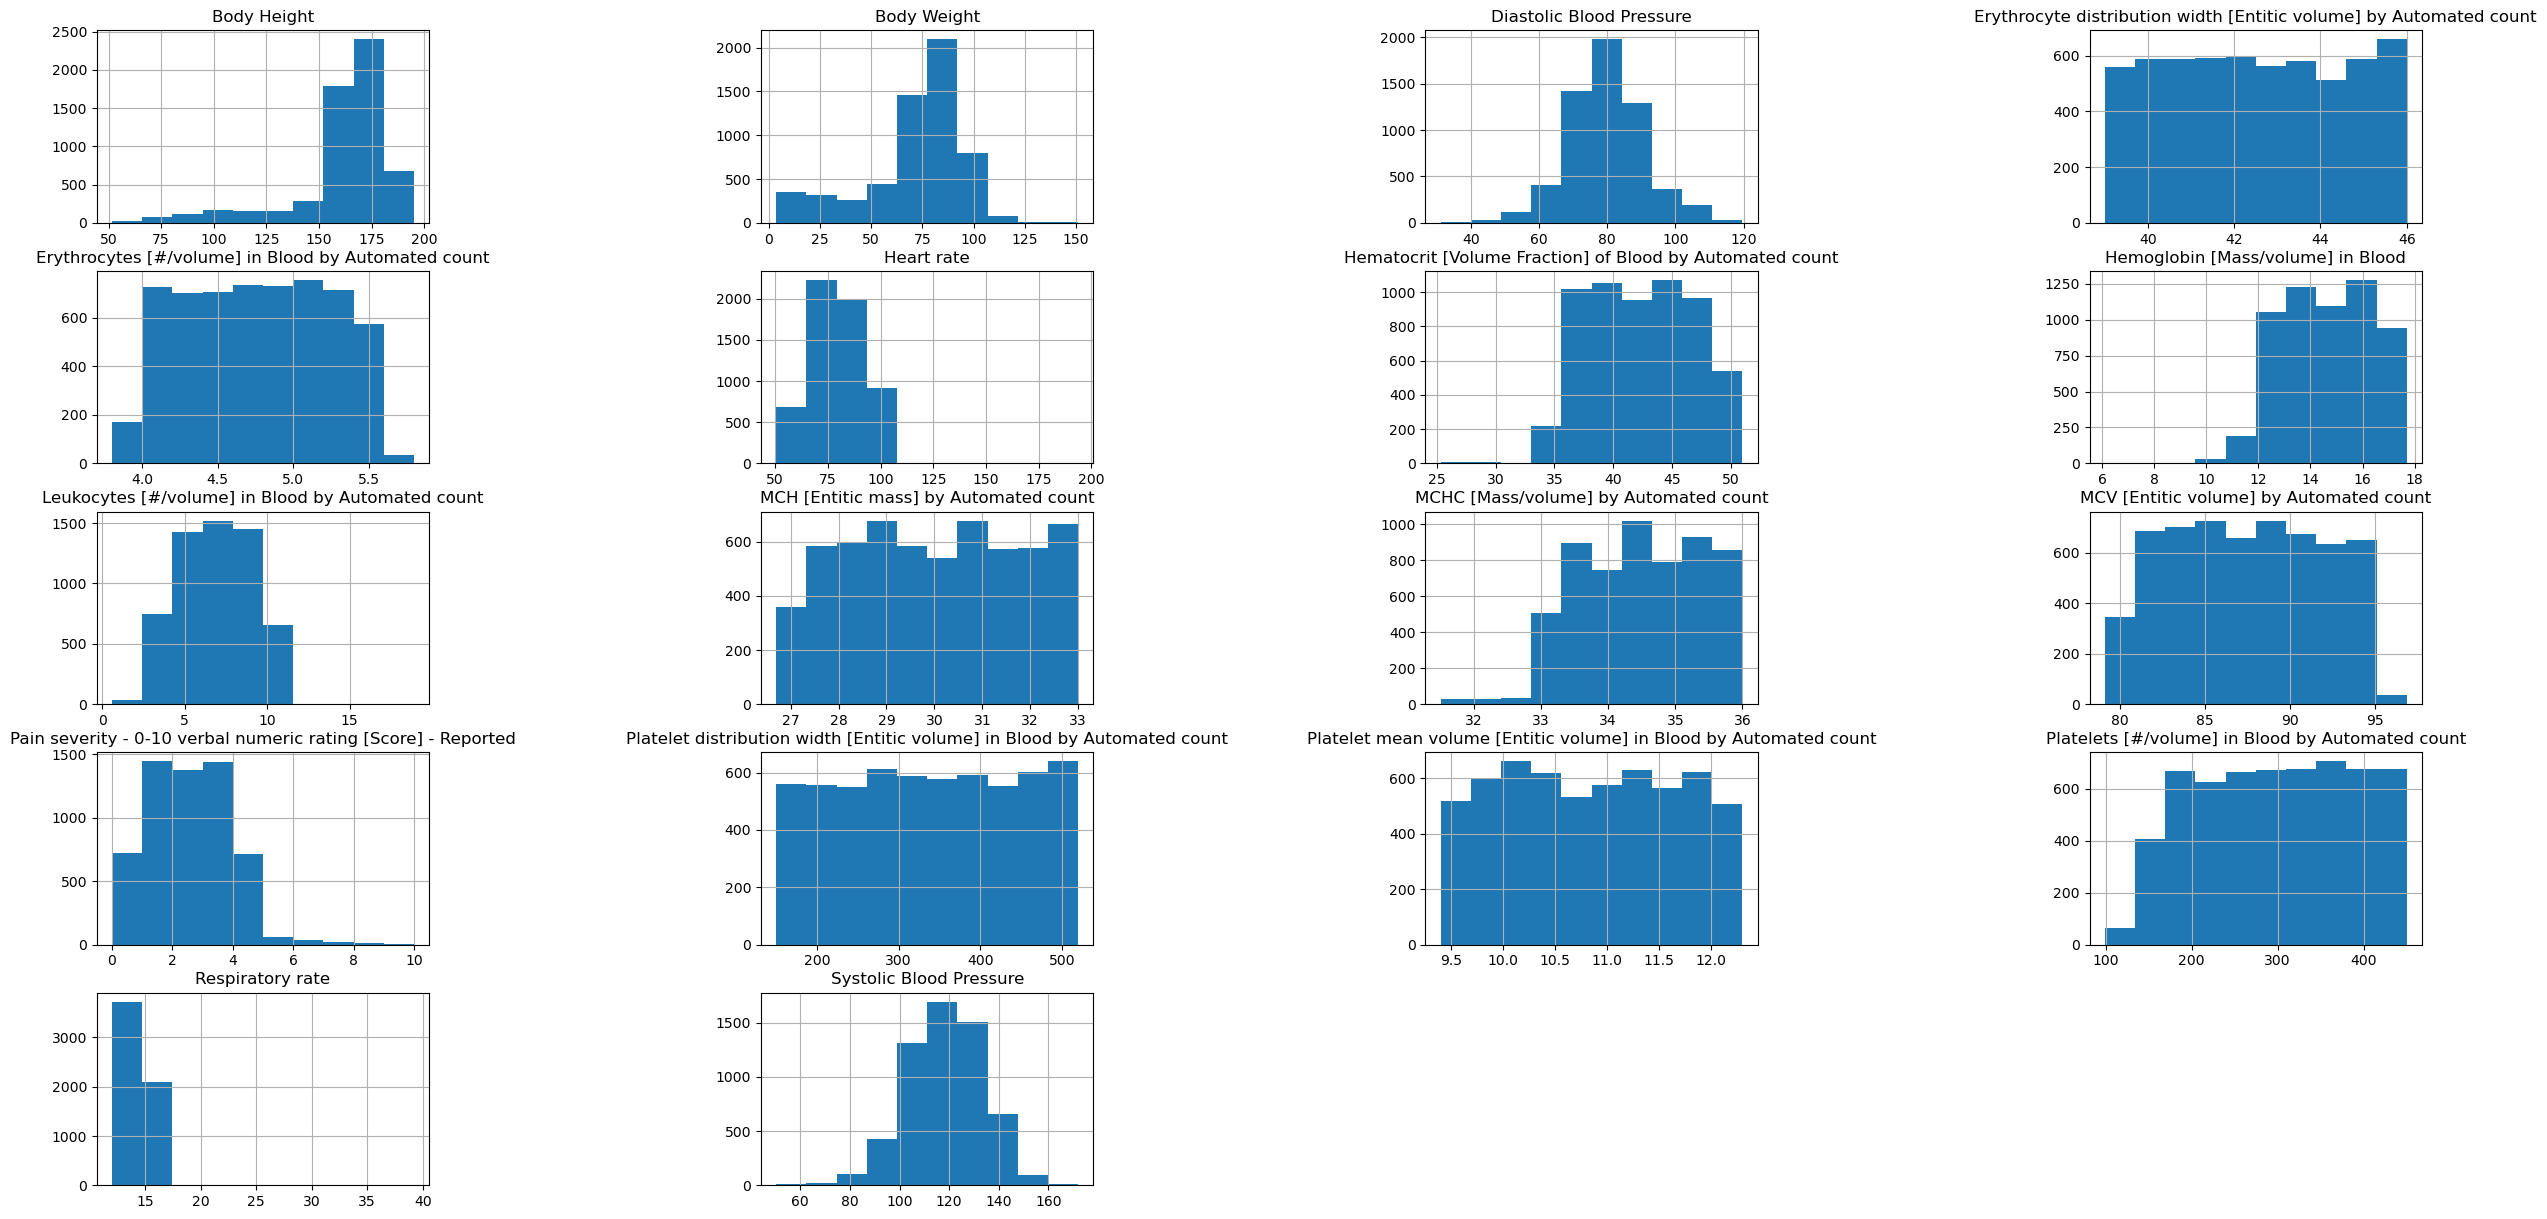

In [112]:
obs_filtered_0.hist(figsize = (30, 15))
plt.subplots_adjust(hspace = 0.25, wspace = 1);

There are a lot of different types of distributions here. Diastolic Blood Pressure and Systolic Blood Pressure have relatively normal distributions, while others such as Body Height and Body Weight are very left skewed.

The observations dataframe is merged with the patients dataframe to begin building up the dataframe for modeling in future sections of this capstone project. For now, all observations are included that have no more than 90% missing values, but it will be important to determine how to deal with the missing values and which columns keep or drop.

In [115]:
df = df.merge(obs_filtered_90, how = 'left', left_on = 'Id', right_on = 'PATIENT')
df

,Id,BIRTHDATE,SSN,FIRST,LAST,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,...,Total score [AUDIT-C],Total score [DAST-10],Total score [HARK],Triglycerides,Urea nitrogen [Mass/volume] in Blood,Urea nitrogen [Mass/volume] in Serum or Plasma,Weight-for-length Per age and sex,What was your best estimate of the total income of all family members from all sources before taxes in last year?,Within the last year have you been afraid of your partner or ex-partner?,pH of Urine by Test strip
0,0e834632-ac19-f67a-a931-eeaad341af8a,2020-04-01,999-73-9599,Berry486,Leannon79,white,nonhispanic,M,Huntsville Alabama US,463 Hagenes Dam Apt 15,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45.2,<NA>,<NA>,<NA>
1,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,1981-01-07,999-35-3783,Margarito178,Lockman863,white,nonhispanic,M,Birmingham Alabama US,413 Feest Track,...,1,1,0,120.9,18.7,<NA>,<NA>,89823,No,<NA>
2,bd670871-fcd9-6c34-6616-8faa27bccdfc,2000-07-09,999-17-6829,Chong355,Bergnaum523,white,nonhispanic,M,Huntsville Alabama US,175 Goodwin View,...,8,1,0,<NA>,<NA>,<NA>,<NA>,54400,No,<NA>
3,8208a9d1-02cb-3302-866e-9d0bd8f8ed67,2007-12-23,999-34-8090,Harry448,White193,black,nonhispanic,M,Holtville Alabama US,173 McLaughlin Track,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,6286c263-7984-d01a-0228-9cd53c5aa010,1989-01-03,999-48-1638,Kieth891,Bartell116,white,nonhispanic,M,Huntsville Alabama US,702 Ryan Meadow Unit 70,...,0,1,0,116.6,<NA>,<NA>,<NA>,93837,No,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,613f1c35-67dc-98df-2055-1f1435a62dd2,1938-09-12,999-41-9953,Dominique369,Erdman779,asian,nonhispanic,F,Powell Wyoming US,798 Weber Wall Unit 27,...,1,0,0,179.1,12.0,12.0,<NA>,744167,No,6.4
4996,6f812221-030b-9b27-7a09-694eaf705bb7,1956-09-08,999-28-3421,Stacey209,Kihn564,white,nonhispanic,F,Urie Wyoming US,881 Dickens Avenue,...,<NA>,<NA>,0,103.6,19.4,19.4,<NA>,24136,No,5.7
4997,53d3f1df-043e-f016-5fd2-8adcbfd6f9fc,1940-07-22,999-86-1535,Owen89,Pollich983,white,nonhispanic,M,Casper Wyoming US,790 Hegmann Junction,...,3,2,0,147.0,19.0,<NA>,<NA>,117069,No,<NA>
4998,e415d6de-36b3-70c8-6e96-55232a481180,1936-09-22,999-92-2414,Wesley533,Reilly981,white,nonhispanic,M,Bairoil Wyoming US,610 Harber Wall,...,2,2,0,151.4,7.7,8.3,<NA>,130857,No,6.0


It is important to manually check over the columns and determine which ones will be useful to include for analysis. Some columns may be repeats of one another, and others may not be useful for statistical analysis and modeling (such as first and last name, zip code, etc). The columns are examined and a list of the most useful columns is created to filter the dataframe.

In [117]:
# df.dtypes
cols_to_keep = ['Id', 'RACE', 'ETHNICITY', 'GENDER', 'CITY', 'STATE', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'INCOME', 'AGE', 'encounters_cost',
                'num_encounters', 'meds_cost', 'num_meds', 'procedures_cost', 'num_procedures', 'immunizations_cost', 'num_immunizations',
                'num_allergies', 'Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma', 
                'Albumin [Mass/volume] in Serum or Plasma', 'Alkaline phosphatase [Enzymatic activity/volume] in Serum or Plasma',
                'Alkaline phosphatase [Enzymatic activity/volume] in Serum or Plasma', 'Appearance of Urine',
                'Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma', 'Bilirubin.total [Mass/volume] in Serum or Plasma', 
                'Bilirubin.total [Mass/volume] in Urine by Test strip', 'Bilirubin.total [Presence] in Urine by Test strip', 'Body Height', 
                'Body Weight', 'Body mass index (BMI) [Percentile] Per age and sex', 'Body mass index (BMI) [Ratio]', 'Body temperature', 
                'Calcium [Mass/volume] in Blood', 'Calcium [Mass/volume] in Serum or Plasma', 'Carbon dioxide  total [Moles/volume] in Blood',
                'Carbon dioxide  total [Moles/volume] in Serum or Plasma', 'Chloride [Moles/volume] in Blood',
                'Chloride [Moles/volume] in Serum or Plasma', 'Cholesterol [Mass/volume] in Serum or Plasma',
                'Cholesterol in HDL [Mass/volume] in Serum or Plasma', 'Color of Urine', 'Creatinine [Mass/volume] in Blood',
                'Creatinine [Mass/volume] in Serum or Plasma', 'DALY', 'Diastolic Blood Pressure',
                'Erythrocyte distribution width [Entitic volume] by Automated count', 'Erythrocytes [#/volume] in Blood by Automated count',
                'Fall risk total [Morse Fall Scale]', 'Generalized anxiety disorder 7 item (GAD-7) total score [Reported.PHQ]',
                'Globulin [Mass/volume] in Serum by calculation',
                'Glomerular filtration rate/1.73 sq M.predicted [Volume Rate/Area] in Serum or Plasma by Creatinine-based formula (MDRD)',
                'Glucose [Mass/volume] in Blood', 'Glucose [Mass/volume] in Serum or Plasma', 'Glucose [Mass/volume] in Urine by Test strip',
                'Glucose [Presence] in Urine by Test strip', 'Head Occipital-frontal circumference', 'Head Occipital-frontal circumference Percentile',
                'Heart rate', 'Hematocrit [Volume Fraction] of Blood', 'Hematocrit [Volume Fraction] of Blood by Automated count',
                'Hemoglobin A1c/Hemoglobin.total in Blood', 'Hemoglobin [Mass/volume] in Blood', 'Hemoglobin [Presence] in Urine by Test strip', 
                'Ketones [Mass/volume] in Urine by Test strip', 'Ketones [Presence] in Urine by Test strip',
                'Leukocyte esterase [Presence] in Urine by Test strip', 'Leukocytes [#/volume] in Blood by Automated count',
                'Low Density Lipoprotein Cholesterol', 'MCH [Entitic mass] by Automated count', 'MCHC [Mass/volume] by Automated count', 
                'MCV [Entitic volume] by Automated count', 'Nitrite [Presence] in Urine by Test strip', 'Odor of Urine',
                'Oxygen saturation in Arterial blood', 'Pain severity - 0-10 verbal numeric rating [Score] - Reported',
                'Platelet distribution width [Entitic volume] in Blood by Automated count', 
                'Platelet mean volume [Entitic volume] in Blood by Automated count', 'Platelets [#/volume] in Blood by Automated count',
                'Potassium [Moles/volume] in Blood', 'Potassium [Moles/volume] in Serum or Plasma', 'Protein [Mass/volume] in Serum or Plasma',
                'Protein [Mass/volume] in Urine by Test strip', 'Protein [Presence] in Urine by Test strip', 'QALY', 'QOLS', 'Respiratory rate',
                'Sodium [Moles/volume] in Blood', 'Sodium [Moles/volume] in Serum or Plasma', 'Specific gravity of Urine by Test strip',
                'Stress level', 'Systolic Blood Pressure', 'Tobacco smoking status', 'Total score [AUDIT-C]', 'Total score [DAST-10]',
                'Total score [HARK]', 'Triglycerides', 'Urea nitrogen [Mass/volume] in Blood', 'Urea nitrogen [Mass/volume] in Serum or Plasma',
                'Weight-for-length Per age and sex', 'pH of Urine by Test strip']

In [118]:
df_keep_cols = df[cols_to_keep]

Certain columns of type 'string' or 'object' that can be converted into numerical values are converted appropriately.

In [120]:
df_keep_cols['Appearance of Urine'] = df_keep_cols['Appearance of Urine'].fillna('none')
df_keep_cols['Appearance of Urine'] = [1 if x == 'Cloudy urine (finding)' else 0 for x in df_keep_cols['Appearance of Urine']]

In [121]:
df_keep_cols['Bilirubin.total [Presence] in Urine by Test strip'] = df_keep_cols['Bilirubin.total [Presence] in Urine by Test strip'].fillna('none')
df_keep_cols['Bilirubin.total [Presence] in Urine by Test strip'] = [0 if x == 'none' or '0.0' 
                                                           else 1 for x in df_keep_cols['Bilirubin.total [Presence] in Urine by Test strip']]

In [122]:
df_keep_cols['Color of Urine'] = df_keep_cols['Color of Urine'].fillna('none')
df_keep_cols['Color of Urine'] = [1 if x == 'Brown color (qualifier value)' or 'Reddish color urine' else 0 for x in df_keep_cols['Color of Urine']]

In [123]:
df_keep_cols['Glucose [Presence] in Urine by Test strip'] = df_keep_cols['Glucose [Presence] in Urine by Test strip'].fillna('none')
df_keep_cols['Glucose [Presence] in Urine by Test strip'] = [1 if x == '1.0' or 'Urine glucose test = ++ (finding)' 
                                                   else 0 for x in df_keep_cols['Glucose [Presence] in Urine by Test strip']]

In [124]:
df_keep_cols['Hemoglobin [Presence] in Urine by Test strip'] = df_keep_cols['Hemoglobin [Presence] in Urine by Test strip'].fillna('none')
df_keep_cols['Hemoglobin [Presence] in Urine by Test strip'] = [1 if x == 'Urine blood test = + (finding)' or 'Blood in urine (finding)' 
                                                   else 0 for x in df_keep_cols['Hemoglobin [Presence] in Urine by Test strip']] 

In [125]:
df_keep_cols['Ketones [Presence] in Urine by Test strip'] = df_keep_cols['Ketones [Presence] in Urine by Test strip'].fillna('none')
df_keep_cols['Ketones [Presence] in Urine by Test strip'] = [0 if x == 'none' or 'Urine ketone test negative (finding)' or '0.0'
                                                   else 1 for x in df_keep_cols['Ketones [Presence] in Urine by Test strip']] 

In [126]:
df_keep_cols['Leukocyte esterase [Presence] in Urine by Test strip'] = df_keep_cols['Leukocyte esterase [Presence] in Urine by Test strip'].fillna('none')
df_keep_cols['Leukocyte esterase [Presence] in Urine by Test strip'] = [1 if x == 'Urine leukocyte test = + (finding)'
                                                   else 0 for x in df_keep_cols['Leukocyte esterase [Presence] in Urine by Test strip']] 

In [127]:
df_keep_cols['Nitrite [Presence] in Urine by Test strip'] = df_keep_cols['Nitrite [Presence] in Urine by Test strip'].fillna('none')
df_keep_cols['Nitrite [Presence] in Urine by Test strip'] = [1 if x == 'Urine nitrite positive (finding)' or '1.0'
                                                   else 0 for x in df_keep_cols['Nitrite [Presence] in Urine by Test strip']]

In [128]:
df_keep_cols['Odor of Urine'] = df_keep_cols['Odor of Urine'].fillna('none')
df_keep_cols['Odor of Urine'] = [0 if x == 'none' else 1 for x in df_keep_cols['Odor of Urine']]

In [129]:
df_keep_cols['Protein [Presence] in Urine by Test strip'] = df_keep_cols['Protein [Presence] in Urine by Test strip'].fillna('none')
df_keep_cols['Protein [Presence] in Urine by Test strip'] = [0 if x == 'none' or '0.0'
                                                   else 1 for x in df_keep_cols['Protein [Presence] in Urine by Test strip']]

In [130]:
df_keep_cols['Stress level'] = df_keep_cols['Stress level'].fillna('none')
df_keep_cols['Stress level'] = [1 if x == 'Not at all'
                      else 2 if x == 'A little bit'
                      else 3 if x == 'Somewhat'
                      else 4 if x == 'Quite a bit'
                      else 5 if x == 'Very much'
                      else 0 for x in df_keep_cols['Stress level']]

In [131]:
df_keep_cols['Tobacco smoking status'] = df_keep_cols['Tobacco smoking status'].fillna('none')
df_keep_cols['Tobacco smoking status'] = [1 if x == 'Ex-smoker (finding)'
                                else 2 if x == 'Smokes tobacco daily (finding)'
                                else 0 for x in df_keep_cols['Tobacco smoking status']]

In [132]:
df_keep_cols

,Id,RACE,ETHNICITY,GENDER,CITY,STATE,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME,AGE,...,Systolic Blood Pressure,Tobacco smoking status,Total score [AUDIT-C],Total score [DAST-10],Total score [HARK],Triglycerides,Urea nitrogen [Mass/volume] in Blood,Urea nitrogen [Mass/volume] in Serum or Plasma,Weight-for-length Per age and sex,pH of Urine by Test strip
0,0e834632-ac19-f67a-a931-eeaad341af8a,white,nonhispanic,M,Lincoln,Alabama,900.00,20136.45,21478,3,...,97.0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,45.2,<NA>
1,819e8c6a-a8a1-39d8-00a0-a360e0c2e15c,white,nonhispanic,M,Moody,Alabama,98921.73,0.00,89823,42,...,138.0,0,1,1,0,120.9,18.7,<NA>,<NA>,<NA>
2,bd670871-fcd9-6c34-6616-8faa27bccdfc,white,nonhispanic,M,Mobile,Alabama,44245.06,9334.53,54400,23,...,105.0,0,8,1,0,<NA>,<NA>,<NA>,<NA>,<NA>
3,8208a9d1-02cb-3302-866e-9d0bd8f8ed67,black,nonhispanic,M,Hoover,Alabama,43520.86,1261.76,35376,16,...,112.0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,6286c263-7984-d01a-0228-9cd53c5aa010,white,nonhispanic,M,Huntsville,Alabama,114453.55,1431.40,93837,34,...,146.0,0,0,1,0,116.6,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,613f1c35-67dc-98df-2055-1f1435a62dd2,asian,nonhispanic,F,Ranchettes,Wyoming,376528.48,2519267.31,744167,85,...,119.0,0,1,0,0,179.1,12.0,12.0,<NA>,6.4
4996,6f812221-030b-9b27-7a09-694eaf705bb7,white,nonhispanic,F,Cheyenne,Wyoming,259970.29,1267448.07,24136,67,...,120.0,0,<NA>,<NA>,0,103.6,19.4,19.4,<NA>,5.7
4997,53d3f1df-043e-f016-5fd2-8adcbfd6f9fc,white,nonhispanic,M,Afton,Wyoming,290867.71,81699.96,117069,83,...,108.0,1,3,2,0,147.0,19.0,<NA>,<NA>,<NA>
4998,e415d6de-36b3-70c8-6e96-55232a481180,white,nonhispanic,M,Casper,Wyoming,204974.70,571755.51,130857,87,...,104.0,0,2,2,0,151.4,7.7,8.3,<NA>,6.0


The summary statistics for each row are observed.

In [134]:
pd.options.display.max_rows = 100
df_keep_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
HEALTHCARE_EXPENSES,5000.0,203868.978404,311442.821622,100.0,19571.325,87535.36,229686.4675,2621689.51
HEALTHCARE_COVERAGE,5000.0,312768.84289,434436.259599,0.0,16224.0525,115763.63,482226.9025,5852332.72
INCOME,5000.0,87462.8998,131846.10156,34.0,26819.75,54104.5,95080.25,986892.0
AGE,5000.0,37.8686,23.516512,-1.0,18.0,37.0,56.0,109.0
encounters_cost,4660.0,15907.685077,35591.339255,59.64,1367.7775,4740.97,11366.0225,709730.3
num_encounters,4660.0,6.127682,13.824188,1.0,2.0,3.0,5.0,129.0
meds_cost,3431.0,4241.394652,47219.41606,0.9,197.56,585.04,3393.46,2726639.54
num_meds,3431.0,7.93413,21.361822,1.0,1.0,2.0,5.0,364.0
procedures_cost,4384.0,18415.600123,36555.648629,61.96,2973.4875,6484.19,14594.02,714866.23
num_procedures,4384.0,19.651004,27.436335,1.0,6.0,12.0,19.0,205.0


In this section of the capstone project, several csv files containing synthetic medical records from Synthea were loaded into the workspace. These data tables were modified so that they can be merged together to create one large dataset for modeling purposes. During the data wrangling steps, it was determined that the total medical encounter cost for 2023 was skewed to the right, with many high outliers. This variable will be the target feature for modeling later in the project, so the shape of this data will have to be taken into account in future steps. The observations csv file contains the results of many useful medical tests and measurements, which may prove useful in predicting a patient's medical encounter costs for the year. However, there are many missing values throughout this data set. It will be important to infer why these values might be missing, such as the test not being required or appropriate for the patient. Additionally, the best method to impute missing values must be determined, including techniques such as mean, median, multiple imputation using chained equations (MICE), probabilistic principal component analysis (PPCA), or an imputation technique from Python's sci-kit learn package. Different techniques can be tested, and the shape of the data and model performance can be analyzed. In the next section of this project, exploratory data analysis will be performed to understand relationships between features.

Finally, the dataframe will be saved as a csv to use in subsequent steps of this capstone.

In [137]:
df_keep_cols.to_csv('synthea_data_wrangling.csv')